In [118]:
#Using Kaggle API to connect to datasets for the Digit Recognizer Active competition
from google.colab import files
files.upload()

{}

In [119]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Nov 10 20:52 kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [122]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2782            True  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      10054            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4367           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         30           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       1727           False  
quora-insincere-questions-classification       2019-02-05 23:59:00  Featured           $25,000        543           False  
pubg-fin

In [123]:
!kaggle competitions download -c digit-recognizer

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [0]:
#importing the training datasets
x_train = pd.read_csv("/content/train.csv")

In [126]:
x_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
x_train.shape

(42000, 785)

In [0]:
#removing the class label data
y_train = x_train['label']

In [129]:
y_train.shape

(42000,)

In [130]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [0]:
x_train = x_train.drop(columns=['label'],axis =1)

In [132]:
x_train.shape

(42000, 784)

In [133]:
#Checking the data for null values, value counts and data description and distribution
x_train.isnull().values.any()

False

In [134]:
x_train.isna().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [135]:
y_train.isnull().values.any()

False

In [136]:
#checking of the class values counts of the class labels
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

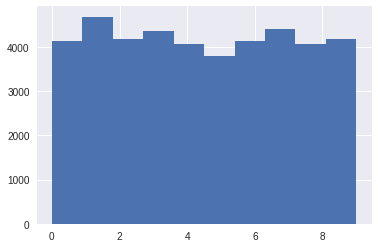

In [137]:
y_train.hist()

In [138]:
#Exploring the training dataset
x_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [0]:
#Normalizing the training dataset and chanelizing to grayscale
x_train = x_train/255.0


In [140]:
'''#Reshaping the training dataset
img_row =28
img_col = 28
x_train = x_train.values.reshape(-1,img_row,img_col,1)'''

'#Reshaping the training dataset\nimg_row =28\nimg_col = 28\nx_train = x_train.values.reshape(-1,img_row,img_col,1)'

In [0]:
#Spliting the data into train and validate sets
from sklearn.model_selection import train_test_split
X_train,X_validate,Y_train,Y_validate = train_test_split( x_train, y_train, test_size=0.20, random_state=0)

In [142]:
X_train.shape

(33600, 784)

In [143]:
X_validate.shape

(8400, 784)

In [144]:
Y_train.shape

(33600,)

In [145]:
Y_validate.shape

(8400,)

In [147]:
#Creating the MLP CLassifier Type 1 for MultiClass Classification without one hot encoding of the class labels and without reshaping the images
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
scores =['accuracy']
model = MLPClassifier()
params = {'hidden_layer_sizes':[(100),(50,50)],'max_iter':[10,20],'alpha':[1e-4,1e-3],'solver':['sgd'],'verbose':[10],'tol':[1e-4,1e-3],'random_state':[42,52],'learning_rate_init':[0.1,0.01]}
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(model, params, cv=5,scoring='%s' % score)
    clf.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Y_validate, clf.predict(X_validate)
    print(classification_report(y_true, y_pred))
    print("Detailed confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Accuracy Score: \n")
    print(accuracy_score(y_true, y_pred))

    print()

# Tuning hyper-parameters for accuracy

Iteration 1, loss = 0.42443926
Iteration 2, loss = 0.19111692
Iteration 3, loss = 0.13327344
Iteration 4, loss = 0.09975400
Iteration 5, loss = 0.07798419
Iteration 6, loss = 0.06281225
Iteration 7, loss = 0.05078479
Iteration 8, loss = 0.04354475
Iteration 9, loss = 0.03525503
Iteration 10, loss = 0.02832699


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42586539
Iteration 2, loss = 0.19523225
Iteration 3, loss = 0.13635512
Iteration 4, loss = 0.10536582
Iteration 5, loss = 0.08230128
Iteration 6, loss = 0.06783235
Iteration 7, loss = 0.05593132
Iteration 8, loss = 0.04606509
Iteration 9, loss = 0.03800518
Iteration 10, loss = 0.03269164


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42715948
Iteration 2, loss = 0.19689666
Iteration 3, loss = 0.13798871
Iteration 4, loss = 0.10456164
Iteration 5, loss = 0.08268120
Iteration 6, loss = 0.06765179
Iteration 7, loss = 0.05458300
Iteration 8, loss = 0.04616246
Iteration 9, loss = 0.03781026
Iteration 10, loss = 0.03003393


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42820819
Iteration 2, loss = 0.19186921
Iteration 3, loss = 0.13414747
Iteration 4, loss = 0.10207327
Iteration 5, loss = 0.07891697
Iteration 6, loss = 0.06297808
Iteration 7, loss = 0.05149303
Iteration 8, loss = 0.04236167
Iteration 9, loss = 0.03481901
Iteration 10, loss = 0.02835101


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42405712
Iteration 2, loss = 0.19016513
Iteration 3, loss = 0.13410431
Iteration 4, loss = 0.09929429
Iteration 5, loss = 0.07930859
Iteration 6, loss = 0.06273962
Iteration 7, loss = 0.05237553
Iteration 8, loss = 0.04303565
Iteration 9, loss = 0.03522648
Iteration 10, loss = 0.02946564


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42443926
Iteration 2, loss = 0.19111692
Iteration 3, loss = 0.13327344
Iteration 4, loss = 0.09975400
Iteration 5, loss = 0.07798419
Iteration 6, loss = 0.06281225
Iteration 7, loss = 0.05078479
Iteration 8, loss = 0.04354475
Iteration 9, loss = 0.03525503
Iteration 10, loss = 0.02832699


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42586539
Iteration 2, loss = 0.19523225
Iteration 3, loss = 0.13635512
Iteration 4, loss = 0.10536582
Iteration 5, loss = 0.08230128
Iteration 6, loss = 0.06783235
Iteration 7, loss = 0.05593132
Iteration 8, loss = 0.04606509
Iteration 9, loss = 0.03800518
Iteration 10, loss = 0.03269164


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42715948
Iteration 2, loss = 0.19689666
Iteration 3, loss = 0.13798871
Iteration 4, loss = 0.10456164
Iteration 5, loss = 0.08268120
Iteration 6, loss = 0.06765179
Iteration 7, loss = 0.05458300
Iteration 8, loss = 0.04616246
Iteration 9, loss = 0.03781026
Iteration 10, loss = 0.03003393


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42820819
Iteration 2, loss = 0.19186921
Iteration 3, loss = 0.13414747
Iteration 4, loss = 0.10207327
Iteration 5, loss = 0.07891697
Iteration 6, loss = 0.06297808
Iteration 7, loss = 0.05149303
Iteration 8, loss = 0.04236167
Iteration 9, loss = 0.03481901
Iteration 10, loss = 0.02835101


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42405712
Iteration 2, loss = 0.19016513
Iteration 3, loss = 0.13410431
Iteration 4, loss = 0.09929429
Iteration 5, loss = 0.07930859
Iteration 6, loss = 0.06273962
Iteration 7, loss = 0.05237553
Iteration 8, loss = 0.04303565
Iteration 9, loss = 0.03522648
Iteration 10, loss = 0.02946564


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41317843
Iteration 2, loss = 0.18018532
Iteration 3, loss = 0.12815324
Iteration 4, loss = 0.09811834
Iteration 5, loss = 0.07618943
Iteration 6, loss = 0.06187196
Iteration 7, loss = 0.05239713
Iteration 8, loss = 0.04161923
Iteration 9, loss = 0.03504119
Iteration 10, loss = 0.02924197


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41869844
Iteration 2, loss = 0.19000633
Iteration 3, loss = 0.13283812
Iteration 4, loss = 0.10196815
Iteration 5, loss = 0.08219108
Iteration 6, loss = 0.06647845
Iteration 7, loss = 0.05460523
Iteration 8, loss = 0.04480957
Iteration 9, loss = 0.03583448
Iteration 10, loss = 0.02989619


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42050960
Iteration 2, loss = 0.18637572
Iteration 3, loss = 0.13230732
Iteration 4, loss = 0.10102268
Iteration 5, loss = 0.08061918
Iteration 6, loss = 0.06522477
Iteration 7, loss = 0.05362093
Iteration 8, loss = 0.04365927
Iteration 9, loss = 0.03560527
Iteration 10, loss = 0.03034775


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41821218
Iteration 2, loss = 0.18392451
Iteration 3, loss = 0.13100497
Iteration 4, loss = 0.10049683
Iteration 5, loss = 0.07991006
Iteration 6, loss = 0.06494857
Iteration 7, loss = 0.05457032
Iteration 8, loss = 0.04339668
Iteration 9, loss = 0.03626685
Iteration 10, loss = 0.02968274


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41284259
Iteration 2, loss = 0.18299775
Iteration 3, loss = 0.12913305
Iteration 4, loss = 0.09940048
Iteration 5, loss = 0.08017659
Iteration 6, loss = 0.06515145
Iteration 7, loss = 0.05219732
Iteration 8, loss = 0.04454900
Iteration 9, loss = 0.03704586
Iteration 10, loss = 0.03030897


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41317843
Iteration 2, loss = 0.18018532
Iteration 3, loss = 0.12815324
Iteration 4, loss = 0.09811834
Iteration 5, loss = 0.07618943
Iteration 6, loss = 0.06187196
Iteration 7, loss = 0.05239713
Iteration 8, loss = 0.04161923
Iteration 9, loss = 0.03504119
Iteration 10, loss = 0.02924197


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41869844
Iteration 2, loss = 0.19000633
Iteration 3, loss = 0.13283812
Iteration 4, loss = 0.10196815
Iteration 5, loss = 0.08219108
Iteration 6, loss = 0.06647845
Iteration 7, loss = 0.05460523
Iteration 8, loss = 0.04480957
Iteration 9, loss = 0.03583448
Iteration 10, loss = 0.02989619


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42050960
Iteration 2, loss = 0.18637572
Iteration 3, loss = 0.13230732
Iteration 4, loss = 0.10102268
Iteration 5, loss = 0.08061918
Iteration 6, loss = 0.06522477
Iteration 7, loss = 0.05362093
Iteration 8, loss = 0.04365927
Iteration 9, loss = 0.03560527
Iteration 10, loss = 0.03034775


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41821218
Iteration 2, loss = 0.18392451
Iteration 3, loss = 0.13100497
Iteration 4, loss = 0.10049683
Iteration 5, loss = 0.07991006
Iteration 6, loss = 0.06494857
Iteration 7, loss = 0.05457032
Iteration 8, loss = 0.04339668
Iteration 9, loss = 0.03626685
Iteration 10, loss = 0.02968274


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41284259
Iteration 2, loss = 0.18299775
Iteration 3, loss = 0.12913305
Iteration 4, loss = 0.09940048
Iteration 5, loss = 0.08017659
Iteration 6, loss = 0.06515145
Iteration 7, loss = 0.05219732
Iteration 8, loss = 0.04454900
Iteration 9, loss = 0.03704586
Iteration 10, loss = 0.03030897


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42443926
Iteration 2, loss = 0.19111692
Iteration 3, loss = 0.13327344
Iteration 4, loss = 0.09975400
Iteration 5, loss = 0.07798419
Iteration 6, loss = 0.06281225
Iteration 7, loss = 0.05078479
Iteration 8, loss = 0.04354475
Iteration 9, loss = 0.03525503
Iteration 10, loss = 0.02832699
Iteration 11, loss = 0.02349381
Iteration 12, loss = 0.02030914
Iteration 13, loss = 0.01678685
Iteration 14, loss = 0.01429149
Iteration 15, loss = 0.01193065
Iteration 16, loss = 0.00998145
Iteration 17, loss = 0.00863361
Iteration 18, loss = 0.00764857
Iteration 19, loss = 0.00649817
Iteration 20, loss = 0.00573050


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42586539
Iteration 2, loss = 0.19523225
Iteration 3, loss = 0.13635512
Iteration 4, loss = 0.10536582
Iteration 5, loss = 0.08230128
Iteration 6, loss = 0.06783235
Iteration 7, loss = 0.05593132
Iteration 8, loss = 0.04606509
Iteration 9, loss = 0.03800518
Iteration 10, loss = 0.03269164
Iteration 11, loss = 0.02602830
Iteration 12, loss = 0.02181906
Iteration 13, loss = 0.01807088
Iteration 14, loss = 0.01472913
Iteration 15, loss = 0.01213456
Iteration 16, loss = 0.01031844
Iteration 17, loss = 0.00875006
Iteration 18, loss = 0.00778980
Iteration 19, loss = 0.00688533
Iteration 20, loss = 0.00577671


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42715948
Iteration 2, loss = 0.19689666
Iteration 3, loss = 0.13798871
Iteration 4, loss = 0.10456164
Iteration 5, loss = 0.08268120
Iteration 6, loss = 0.06765179
Iteration 7, loss = 0.05458300
Iteration 8, loss = 0.04616246
Iteration 9, loss = 0.03781026
Iteration 10, loss = 0.03003393
Iteration 11, loss = 0.02538167
Iteration 12, loss = 0.02064815
Iteration 13, loss = 0.01803647
Iteration 14, loss = 0.01498665
Iteration 15, loss = 0.01273823
Iteration 16, loss = 0.01061085
Iteration 17, loss = 0.00899796
Iteration 18, loss = 0.00729134
Iteration 19, loss = 0.00664123
Iteration 20, loss = 0.00567224


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42820819
Iteration 2, loss = 0.19186921
Iteration 3, loss = 0.13414747
Iteration 4, loss = 0.10207327
Iteration 5, loss = 0.07891697
Iteration 6, loss = 0.06297808
Iteration 7, loss = 0.05149303
Iteration 8, loss = 0.04236167
Iteration 9, loss = 0.03481901
Iteration 10, loss = 0.02835101
Iteration 11, loss = 0.02272548
Iteration 12, loss = 0.01857739
Iteration 13, loss = 0.01564136
Iteration 14, loss = 0.01314270
Iteration 15, loss = 0.01085700
Iteration 16, loss = 0.00939548
Iteration 17, loss = 0.00840074
Iteration 18, loss = 0.00654555
Iteration 19, loss = 0.00579962
Iteration 20, loss = 0.00527133


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42405712
Iteration 2, loss = 0.19016513
Iteration 3, loss = 0.13410431
Iteration 4, loss = 0.09929429
Iteration 5, loss = 0.07930859
Iteration 6, loss = 0.06273962
Iteration 7, loss = 0.05237553
Iteration 8, loss = 0.04303565
Iteration 9, loss = 0.03522648
Iteration 10, loss = 0.02946564
Iteration 11, loss = 0.02496785
Iteration 12, loss = 0.02003803
Iteration 13, loss = 0.01736587
Iteration 14, loss = 0.01381022
Iteration 15, loss = 0.01167935
Iteration 16, loss = 0.00943591
Iteration 17, loss = 0.00844724
Iteration 18, loss = 0.00757884
Iteration 19, loss = 0.00642969
Iteration 20, loss = 0.00565749


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42443926
Iteration 2, loss = 0.19111692
Iteration 3, loss = 0.13327344
Iteration 4, loss = 0.09975400
Iteration 5, loss = 0.07798419
Iteration 6, loss = 0.06281225
Iteration 7, loss = 0.05078479
Iteration 8, loss = 0.04354475
Iteration 9, loss = 0.03525503
Iteration 10, loss = 0.02832699
Iteration 11, loss = 0.02349381
Iteration 12, loss = 0.02030914
Iteration 13, loss = 0.01678685
Iteration 14, loss = 0.01429149
Iteration 15, loss = 0.01193065
Iteration 16, loss = 0.00998145
Iteration 17, loss = 0.00863361
Iteration 18, loss = 0.00764857
Iteration 19, loss = 0.00649817
Iteration 20, loss = 0.00573050


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42586539
Iteration 2, loss = 0.19523225
Iteration 3, loss = 0.13635512
Iteration 4, loss = 0.10536582
Iteration 5, loss = 0.08230128
Iteration 6, loss = 0.06783235
Iteration 7, loss = 0.05593132
Iteration 8, loss = 0.04606509
Iteration 9, loss = 0.03800518
Iteration 10, loss = 0.03269164
Iteration 11, loss = 0.02602830
Iteration 12, loss = 0.02181906
Iteration 13, loss = 0.01807088
Iteration 14, loss = 0.01472913
Iteration 15, loss = 0.01213456
Iteration 16, loss = 0.01031844
Iteration 17, loss = 0.00875006
Iteration 18, loss = 0.00778980
Iteration 19, loss = 0.00688533
Iteration 20, loss = 0.00577671


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42715948
Iteration 2, loss = 0.19689666
Iteration 3, loss = 0.13798871
Iteration 4, loss = 0.10456164
Iteration 5, loss = 0.08268120
Iteration 6, loss = 0.06765179
Iteration 7, loss = 0.05458300
Iteration 8, loss = 0.04616246
Iteration 9, loss = 0.03781026
Iteration 10, loss = 0.03003393
Iteration 11, loss = 0.02538167
Iteration 12, loss = 0.02064815
Iteration 13, loss = 0.01803647
Iteration 14, loss = 0.01498665
Iteration 15, loss = 0.01273823
Iteration 16, loss = 0.01061085
Iteration 17, loss = 0.00899796
Iteration 18, loss = 0.00729134
Iteration 19, loss = 0.00664123
Iteration 20, loss = 0.00567224


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42820819
Iteration 2, loss = 0.19186921
Iteration 3, loss = 0.13414747
Iteration 4, loss = 0.10207327
Iteration 5, loss = 0.07891697
Iteration 6, loss = 0.06297808
Iteration 7, loss = 0.05149303
Iteration 8, loss = 0.04236167
Iteration 9, loss = 0.03481901
Iteration 10, loss = 0.02835101
Iteration 11, loss = 0.02272548
Iteration 12, loss = 0.01857739
Iteration 13, loss = 0.01564136
Iteration 14, loss = 0.01314270
Iteration 15, loss = 0.01085700
Iteration 16, loss = 0.00939548
Iteration 17, loss = 0.00840074
Iteration 18, loss = 0.00654555
Iteration 19, loss = 0.00579962
Iteration 20, loss = 0.00527133


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42405712
Iteration 2, loss = 0.19016513
Iteration 3, loss = 0.13410431
Iteration 4, loss = 0.09929429
Iteration 5, loss = 0.07930859
Iteration 6, loss = 0.06273962
Iteration 7, loss = 0.05237553
Iteration 8, loss = 0.04303565
Iteration 9, loss = 0.03522648
Iteration 10, loss = 0.02946564
Iteration 11, loss = 0.02496785
Iteration 12, loss = 0.02003803
Iteration 13, loss = 0.01736587
Iteration 14, loss = 0.01381022
Iteration 15, loss = 0.01167935
Iteration 16, loss = 0.00943591
Iteration 17, loss = 0.00844724
Iteration 18, loss = 0.00757884
Iteration 19, loss = 0.00642969
Iteration 20, loss = 0.00565749


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41317843
Iteration 2, loss = 0.18018532
Iteration 3, loss = 0.12815324
Iteration 4, loss = 0.09811834
Iteration 5, loss = 0.07618943
Iteration 6, loss = 0.06187196
Iteration 7, loss = 0.05239713
Iteration 8, loss = 0.04161923
Iteration 9, loss = 0.03504119
Iteration 10, loss = 0.02924197
Iteration 11, loss = 0.02487893
Iteration 12, loss = 0.01998121
Iteration 13, loss = 0.01675542
Iteration 14, loss = 0.01471869
Iteration 15, loss = 0.01180785
Iteration 16, loss = 0.00966272
Iteration 17, loss = 0.00839986
Iteration 18, loss = 0.00782263
Iteration 19, loss = 0.00644562
Iteration 20, loss = 0.00570408


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41869844
Iteration 2, loss = 0.19000633
Iteration 3, loss = 0.13283812
Iteration 4, loss = 0.10196815
Iteration 5, loss = 0.08219108
Iteration 6, loss = 0.06647845
Iteration 7, loss = 0.05460523
Iteration 8, loss = 0.04480957
Iteration 9, loss = 0.03583448
Iteration 10, loss = 0.02989619
Iteration 11, loss = 0.02458489
Iteration 12, loss = 0.02193719
Iteration 13, loss = 0.01724813
Iteration 14, loss = 0.01487438
Iteration 15, loss = 0.01220901
Iteration 16, loss = 0.01064998
Iteration 17, loss = 0.00893913
Iteration 18, loss = 0.00728716
Iteration 19, loss = 0.00630213
Iteration 20, loss = 0.00575117


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42050960
Iteration 2, loss = 0.18637572
Iteration 3, loss = 0.13230732
Iteration 4, loss = 0.10102268
Iteration 5, loss = 0.08061918
Iteration 6, loss = 0.06522477
Iteration 7, loss = 0.05362093
Iteration 8, loss = 0.04365927
Iteration 9, loss = 0.03560527
Iteration 10, loss = 0.03034775
Iteration 11, loss = 0.02402569
Iteration 12, loss = 0.02035348
Iteration 13, loss = 0.01702362
Iteration 14, loss = 0.01472699
Iteration 15, loss = 0.01179026
Iteration 16, loss = 0.00987693
Iteration 17, loss = 0.00852920
Iteration 18, loss = 0.00727846
Iteration 19, loss = 0.00657858
Iteration 20, loss = 0.00556977


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41821218
Iteration 2, loss = 0.18392451
Iteration 3, loss = 0.13100497
Iteration 4, loss = 0.10049683
Iteration 5, loss = 0.07991006
Iteration 6, loss = 0.06494857
Iteration 7, loss = 0.05457032
Iteration 8, loss = 0.04339668
Iteration 9, loss = 0.03626685
Iteration 10, loss = 0.02968274
Iteration 11, loss = 0.02473295
Iteration 12, loss = 0.02009614
Iteration 13, loss = 0.01663203
Iteration 14, loss = 0.01450941
Iteration 15, loss = 0.01176221
Iteration 16, loss = 0.00977010
Iteration 17, loss = 0.00861524
Iteration 18, loss = 0.00745560
Iteration 19, loss = 0.00636002
Iteration 20, loss = 0.00555349


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41284259
Iteration 2, loss = 0.18299775
Iteration 3, loss = 0.12913305
Iteration 4, loss = 0.09940048
Iteration 5, loss = 0.08017659
Iteration 6, loss = 0.06515145
Iteration 7, loss = 0.05219732
Iteration 8, loss = 0.04454900
Iteration 9, loss = 0.03704586
Iteration 10, loss = 0.03030897
Iteration 11, loss = 0.02556212
Iteration 12, loss = 0.02161851
Iteration 13, loss = 0.01766332
Iteration 14, loss = 0.01468611
Iteration 15, loss = 0.01262712
Iteration 16, loss = 0.01071555
Iteration 17, loss = 0.00880748
Iteration 18, loss = 0.00785948
Iteration 19, loss = 0.00644186
Iteration 20, loss = 0.00567522


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41317843
Iteration 2, loss = 0.18018532
Iteration 3, loss = 0.12815324
Iteration 4, loss = 0.09811834
Iteration 5, loss = 0.07618943
Iteration 6, loss = 0.06187196
Iteration 7, loss = 0.05239713
Iteration 8, loss = 0.04161923
Iteration 9, loss = 0.03504119
Iteration 10, loss = 0.02924197
Iteration 11, loss = 0.02487893
Iteration 12, loss = 0.01998121
Iteration 13, loss = 0.01675542
Iteration 14, loss = 0.01471869
Iteration 15, loss = 0.01180785
Iteration 16, loss = 0.00966272
Iteration 17, loss = 0.00839986
Iteration 18, loss = 0.00782263
Iteration 19, loss = 0.00644562
Iteration 20, loss = 0.00570408


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41869844
Iteration 2, loss = 0.19000633
Iteration 3, loss = 0.13283812
Iteration 4, loss = 0.10196815
Iteration 5, loss = 0.08219108
Iteration 6, loss = 0.06647845
Iteration 7, loss = 0.05460523
Iteration 8, loss = 0.04480957
Iteration 9, loss = 0.03583448
Iteration 10, loss = 0.02989619
Iteration 11, loss = 0.02458489
Iteration 12, loss = 0.02193719
Iteration 13, loss = 0.01724813
Iteration 14, loss = 0.01487438
Iteration 15, loss = 0.01220901
Iteration 16, loss = 0.01064998
Iteration 17, loss = 0.00893913
Iteration 18, loss = 0.00728716
Iteration 19, loss = 0.00630213
Iteration 20, loss = 0.00575117


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42050960
Iteration 2, loss = 0.18637572
Iteration 3, loss = 0.13230732
Iteration 4, loss = 0.10102268
Iteration 5, loss = 0.08061918
Iteration 6, loss = 0.06522477
Iteration 7, loss = 0.05362093
Iteration 8, loss = 0.04365927
Iteration 9, loss = 0.03560527
Iteration 10, loss = 0.03034775
Iteration 11, loss = 0.02402569
Iteration 12, loss = 0.02035348
Iteration 13, loss = 0.01702362
Iteration 14, loss = 0.01472699
Iteration 15, loss = 0.01179026
Iteration 16, loss = 0.00987693
Iteration 17, loss = 0.00852920
Iteration 18, loss = 0.00727846
Iteration 19, loss = 0.00657858
Iteration 20, loss = 0.00556977


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41821218
Iteration 2, loss = 0.18392451
Iteration 3, loss = 0.13100497
Iteration 4, loss = 0.10049683
Iteration 5, loss = 0.07991006
Iteration 6, loss = 0.06494857
Iteration 7, loss = 0.05457032
Iteration 8, loss = 0.04339668
Iteration 9, loss = 0.03626685
Iteration 10, loss = 0.02968274
Iteration 11, loss = 0.02473295
Iteration 12, loss = 0.02009614
Iteration 13, loss = 0.01663203
Iteration 14, loss = 0.01450941
Iteration 15, loss = 0.01176221
Iteration 16, loss = 0.00977010
Iteration 17, loss = 0.00861524
Iteration 18, loss = 0.00745560
Iteration 19, loss = 0.00636002
Iteration 20, loss = 0.00555349


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41284259
Iteration 2, loss = 0.18299775
Iteration 3, loss = 0.12913305
Iteration 4, loss = 0.09940048
Iteration 5, loss = 0.08017659
Iteration 6, loss = 0.06515145
Iteration 7, loss = 0.05219732
Iteration 8, loss = 0.04454900
Iteration 9, loss = 0.03704586
Iteration 10, loss = 0.03030897
Iteration 11, loss = 0.02556212
Iteration 12, loss = 0.02161851
Iteration 13, loss = 0.01766332
Iteration 14, loss = 0.01468611
Iteration 15, loss = 0.01262712
Iteration 16, loss = 0.01071555
Iteration 17, loss = 0.00880748
Iteration 18, loss = 0.00785948
Iteration 19, loss = 0.00644186
Iteration 20, loss = 0.00567522


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85827831
Iteration 2, loss = 0.37711364
Iteration 3, loss = 0.32217302
Iteration 4, loss = 0.29240735
Iteration 5, loss = 0.27014206
Iteration 6, loss = 0.25216971
Iteration 7, loss = 0.23647514
Iteration 8, loss = 0.22269877
Iteration 9, loss = 0.21030748
Iteration 10, loss = 0.19860596


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85971416
Iteration 2, loss = 0.38053372
Iteration 3, loss = 0.32651047
Iteration 4, loss = 0.29641672
Iteration 5, loss = 0.27451804
Iteration 6, loss = 0.25758569
Iteration 7, loss = 0.24163738
Iteration 8, loss = 0.22817181
Iteration 9, loss = 0.21545757
Iteration 10, loss = 0.20496082


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85834701
Iteration 2, loss = 0.38226587
Iteration 3, loss = 0.32885579
Iteration 4, loss = 0.29797368
Iteration 5, loss = 0.27534892
Iteration 6, loss = 0.25673005
Iteration 7, loss = 0.24135984
Iteration 8, loss = 0.22701362
Iteration 9, loss = 0.21454767
Iteration 10, loss = 0.20281816


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86032489
Iteration 2, loss = 0.38011769
Iteration 3, loss = 0.32541725
Iteration 4, loss = 0.29462132
Iteration 5, loss = 0.27232082
Iteration 6, loss = 0.25473466
Iteration 7, loss = 0.23911343
Iteration 8, loss = 0.22533947
Iteration 9, loss = 0.21230277
Iteration 10, loss = 0.20118337


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85664118
Iteration 2, loss = 0.37889649
Iteration 3, loss = 0.32440270
Iteration 4, loss = 0.29354262
Iteration 5, loss = 0.27129910
Iteration 6, loss = 0.25257948
Iteration 7, loss = 0.23693658
Iteration 8, loss = 0.22244958
Iteration 9, loss = 0.21040981
Iteration 10, loss = 0.19928695


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85827831
Iteration 2, loss = 0.37711364
Iteration 3, loss = 0.32217302
Iteration 4, loss = 0.29240735
Iteration 5, loss = 0.27014206
Iteration 6, loss = 0.25216971
Iteration 7, loss = 0.23647514
Iteration 8, loss = 0.22269877
Iteration 9, loss = 0.21030748
Iteration 10, loss = 0.19860596


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85971416
Iteration 2, loss = 0.38053372
Iteration 3, loss = 0.32651047
Iteration 4, loss = 0.29641672
Iteration 5, loss = 0.27451804
Iteration 6, loss = 0.25758569
Iteration 7, loss = 0.24163738
Iteration 8, loss = 0.22817181
Iteration 9, loss = 0.21545757
Iteration 10, loss = 0.20496082


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85834701
Iteration 2, loss = 0.38226587
Iteration 3, loss = 0.32885579
Iteration 4, loss = 0.29797368
Iteration 5, loss = 0.27534892
Iteration 6, loss = 0.25673005
Iteration 7, loss = 0.24135984
Iteration 8, loss = 0.22701362
Iteration 9, loss = 0.21454767
Iteration 10, loss = 0.20281816


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86032489
Iteration 2, loss = 0.38011769
Iteration 3, loss = 0.32541725
Iteration 4, loss = 0.29462132
Iteration 5, loss = 0.27232082
Iteration 6, loss = 0.25473466
Iteration 7, loss = 0.23911343
Iteration 8, loss = 0.22533947
Iteration 9, loss = 0.21230277
Iteration 10, loss = 0.20118337


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85664118
Iteration 2, loss = 0.37889649
Iteration 3, loss = 0.32440270
Iteration 4, loss = 0.29354262
Iteration 5, loss = 0.27129910
Iteration 6, loss = 0.25257948
Iteration 7, loss = 0.23693658
Iteration 8, loss = 0.22244958
Iteration 9, loss = 0.21040981
Iteration 10, loss = 0.19928695


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85600945
Iteration 2, loss = 0.36915734
Iteration 3, loss = 0.31139113
Iteration 4, loss = 0.27916368
Iteration 5, loss = 0.25561454
Iteration 6, loss = 0.23666516
Iteration 7, loss = 0.22100881
Iteration 8, loss = 0.20766302
Iteration 9, loss = 0.19572565
Iteration 10, loss = 0.18563552


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85583821
Iteration 2, loss = 0.37257625
Iteration 3, loss = 0.31614510
Iteration 4, loss = 0.28393638
Iteration 5, loss = 0.26130211
Iteration 6, loss = 0.24292308
Iteration 7, loss = 0.22738659
Iteration 8, loss = 0.21361594
Iteration 9, loss = 0.20174359
Iteration 10, loss = 0.19035224


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85804922
Iteration 2, loss = 0.37560634
Iteration 3, loss = 0.31722131
Iteration 4, loss = 0.28493787
Iteration 5, loss = 0.26124792
Iteration 6, loss = 0.24214767
Iteration 7, loss = 0.22565476
Iteration 8, loss = 0.21239585
Iteration 9, loss = 0.20069676
Iteration 10, loss = 0.18976070


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85953346
Iteration 2, loss = 0.37269392
Iteration 3, loss = 0.31426381
Iteration 4, loss = 0.28171205
Iteration 5, loss = 0.25823962
Iteration 6, loss = 0.23938164
Iteration 7, loss = 0.22364820
Iteration 8, loss = 0.21024969
Iteration 9, loss = 0.19808693
Iteration 10, loss = 0.18743013


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85623274
Iteration 2, loss = 0.37180149
Iteration 3, loss = 0.31352967
Iteration 4, loss = 0.28131732
Iteration 5, loss = 0.25779223
Iteration 6, loss = 0.23878191
Iteration 7, loss = 0.22179117
Iteration 8, loss = 0.20813974
Iteration 9, loss = 0.19591490
Iteration 10, loss = 0.18562337


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85600945
Iteration 2, loss = 0.36915734
Iteration 3, loss = 0.31139113
Iteration 4, loss = 0.27916368
Iteration 5, loss = 0.25561454
Iteration 6, loss = 0.23666516
Iteration 7, loss = 0.22100881
Iteration 8, loss = 0.20766302
Iteration 9, loss = 0.19572565
Iteration 10, loss = 0.18563552


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85583821
Iteration 2, loss = 0.37257625
Iteration 3, loss = 0.31614510
Iteration 4, loss = 0.28393638
Iteration 5, loss = 0.26130211
Iteration 6, loss = 0.24292308
Iteration 7, loss = 0.22738659
Iteration 8, loss = 0.21361594
Iteration 9, loss = 0.20174359
Iteration 10, loss = 0.19035224


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85804922
Iteration 2, loss = 0.37560634
Iteration 3, loss = 0.31722131
Iteration 4, loss = 0.28493787
Iteration 5, loss = 0.26124792
Iteration 6, loss = 0.24214767
Iteration 7, loss = 0.22565476
Iteration 8, loss = 0.21239585
Iteration 9, loss = 0.20069676
Iteration 10, loss = 0.18976070


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85953346
Iteration 2, loss = 0.37269392
Iteration 3, loss = 0.31426381
Iteration 4, loss = 0.28171205
Iteration 5, loss = 0.25823962
Iteration 6, loss = 0.23938164
Iteration 7, loss = 0.22364820
Iteration 8, loss = 0.21024969
Iteration 9, loss = 0.19808693
Iteration 10, loss = 0.18743013


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85623274
Iteration 2, loss = 0.37180149
Iteration 3, loss = 0.31352967
Iteration 4, loss = 0.28131732
Iteration 5, loss = 0.25779223
Iteration 6, loss = 0.23878191
Iteration 7, loss = 0.22179117
Iteration 8, loss = 0.20813974
Iteration 9, loss = 0.19591490
Iteration 10, loss = 0.18562337


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85827831
Iteration 2, loss = 0.37711364
Iteration 3, loss = 0.32217302
Iteration 4, loss = 0.29240735
Iteration 5, loss = 0.27014206
Iteration 6, loss = 0.25216971
Iteration 7, loss = 0.23647514
Iteration 8, loss = 0.22269877
Iteration 9, loss = 0.21030748
Iteration 10, loss = 0.19860596
Iteration 11, loss = 0.18848349
Iteration 12, loss = 0.17944119
Iteration 13, loss = 0.17097910
Iteration 14, loss = 0.16342700
Iteration 15, loss = 0.15567424
Iteration 16, loss = 0.14905003
Iteration 17, loss = 0.14293814
Iteration 18, loss = 0.13754563
Iteration 19, loss = 0.13237783
Iteration 20, loss = 0.12704065


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85971416
Iteration 2, loss = 0.38053372
Iteration 3, loss = 0.32651047
Iteration 4, loss = 0.29641672
Iteration 5, loss = 0.27451804
Iteration 6, loss = 0.25758569
Iteration 7, loss = 0.24163738
Iteration 8, loss = 0.22817181
Iteration 9, loss = 0.21545757
Iteration 10, loss = 0.20496082
Iteration 11, loss = 0.19478362
Iteration 12, loss = 0.18549546
Iteration 13, loss = 0.17715089
Iteration 14, loss = 0.16903497
Iteration 15, loss = 0.16170022
Iteration 16, loss = 0.15475582
Iteration 17, loss = 0.14859799
Iteration 18, loss = 0.14252689
Iteration 19, loss = 0.13738921
Iteration 20, loss = 0.13165038


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85834701
Iteration 2, loss = 0.38226587
Iteration 3, loss = 0.32885579
Iteration 4, loss = 0.29797368
Iteration 5, loss = 0.27534892
Iteration 6, loss = 0.25673005
Iteration 7, loss = 0.24135984
Iteration 8, loss = 0.22701362
Iteration 9, loss = 0.21454767
Iteration 10, loss = 0.20281816
Iteration 11, loss = 0.19234458
Iteration 12, loss = 0.18301598
Iteration 13, loss = 0.17483276
Iteration 14, loss = 0.16665900
Iteration 15, loss = 0.15936842
Iteration 16, loss = 0.15292724
Iteration 17, loss = 0.14688074
Iteration 18, loss = 0.14066946
Iteration 19, loss = 0.13581455
Iteration 20, loss = 0.12983654


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86032489
Iteration 2, loss = 0.38011769
Iteration 3, loss = 0.32541725
Iteration 4, loss = 0.29462132
Iteration 5, loss = 0.27232082
Iteration 6, loss = 0.25473466
Iteration 7, loss = 0.23911343
Iteration 8, loss = 0.22533947
Iteration 9, loss = 0.21230277
Iteration 10, loss = 0.20118337
Iteration 11, loss = 0.19134091
Iteration 12, loss = 0.18172009
Iteration 13, loss = 0.17348384
Iteration 14, loss = 0.16517072
Iteration 15, loss = 0.15786252
Iteration 16, loss = 0.15112763
Iteration 17, loss = 0.14529310
Iteration 18, loss = 0.13953217
Iteration 19, loss = 0.13362064
Iteration 20, loss = 0.12909923


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85664118
Iteration 2, loss = 0.37889649
Iteration 3, loss = 0.32440270
Iteration 4, loss = 0.29354262
Iteration 5, loss = 0.27129910
Iteration 6, loss = 0.25257948
Iteration 7, loss = 0.23693658
Iteration 8, loss = 0.22244958
Iteration 9, loss = 0.21040981
Iteration 10, loss = 0.19928695
Iteration 11, loss = 0.18896135
Iteration 12, loss = 0.17946031
Iteration 13, loss = 0.17108346
Iteration 14, loss = 0.16292187
Iteration 15, loss = 0.15574813
Iteration 16, loss = 0.14858506
Iteration 17, loss = 0.14268522
Iteration 18, loss = 0.13672590
Iteration 19, loss = 0.13118335
Iteration 20, loss = 0.12630655


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85827831
Iteration 2, loss = 0.37711364
Iteration 3, loss = 0.32217302
Iteration 4, loss = 0.29240735
Iteration 5, loss = 0.27014206
Iteration 6, loss = 0.25216971
Iteration 7, loss = 0.23647514
Iteration 8, loss = 0.22269877
Iteration 9, loss = 0.21030748
Iteration 10, loss = 0.19860596
Iteration 11, loss = 0.18848349
Iteration 12, loss = 0.17944119
Iteration 13, loss = 0.17097910
Iteration 14, loss = 0.16342700
Iteration 15, loss = 0.15567424
Iteration 16, loss = 0.14905003
Iteration 17, loss = 0.14293814
Iteration 18, loss = 0.13754563
Iteration 19, loss = 0.13237783
Iteration 20, loss = 0.12704065


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85971416
Iteration 2, loss = 0.38053372
Iteration 3, loss = 0.32651047
Iteration 4, loss = 0.29641672
Iteration 5, loss = 0.27451804
Iteration 6, loss = 0.25758569
Iteration 7, loss = 0.24163738
Iteration 8, loss = 0.22817181
Iteration 9, loss = 0.21545757
Iteration 10, loss = 0.20496082
Iteration 11, loss = 0.19478362
Iteration 12, loss = 0.18549546
Iteration 13, loss = 0.17715089
Iteration 14, loss = 0.16903497
Iteration 15, loss = 0.16170022
Iteration 16, loss = 0.15475582
Iteration 17, loss = 0.14859799
Iteration 18, loss = 0.14252689
Iteration 19, loss = 0.13738921
Iteration 20, loss = 0.13165038


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85834701
Iteration 2, loss = 0.38226587
Iteration 3, loss = 0.32885579
Iteration 4, loss = 0.29797368
Iteration 5, loss = 0.27534892
Iteration 6, loss = 0.25673005
Iteration 7, loss = 0.24135984
Iteration 8, loss = 0.22701362
Iteration 9, loss = 0.21454767
Iteration 10, loss = 0.20281816
Iteration 11, loss = 0.19234458
Iteration 12, loss = 0.18301598
Iteration 13, loss = 0.17483276
Iteration 14, loss = 0.16665900
Iteration 15, loss = 0.15936842
Iteration 16, loss = 0.15292724
Iteration 17, loss = 0.14688074
Iteration 18, loss = 0.14066946
Iteration 19, loss = 0.13581455
Iteration 20, loss = 0.12983654


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86032489
Iteration 2, loss = 0.38011769
Iteration 3, loss = 0.32541725
Iteration 4, loss = 0.29462132
Iteration 5, loss = 0.27232082
Iteration 6, loss = 0.25473466
Iteration 7, loss = 0.23911343
Iteration 8, loss = 0.22533947
Iteration 9, loss = 0.21230277
Iteration 10, loss = 0.20118337
Iteration 11, loss = 0.19134091
Iteration 12, loss = 0.18172009
Iteration 13, loss = 0.17348384
Iteration 14, loss = 0.16517072
Iteration 15, loss = 0.15786252
Iteration 16, loss = 0.15112763
Iteration 17, loss = 0.14529310
Iteration 18, loss = 0.13953217
Iteration 19, loss = 0.13362064
Iteration 20, loss = 0.12909923


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85664118
Iteration 2, loss = 0.37889649
Iteration 3, loss = 0.32440270
Iteration 4, loss = 0.29354262
Iteration 5, loss = 0.27129910
Iteration 6, loss = 0.25257948
Iteration 7, loss = 0.23693658
Iteration 8, loss = 0.22244958
Iteration 9, loss = 0.21040981
Iteration 10, loss = 0.19928695
Iteration 11, loss = 0.18896135
Iteration 12, loss = 0.17946031
Iteration 13, loss = 0.17108346
Iteration 14, loss = 0.16292187
Iteration 15, loss = 0.15574813
Iteration 16, loss = 0.14858506
Iteration 17, loss = 0.14268522
Iteration 18, loss = 0.13672590
Iteration 19, loss = 0.13118335
Iteration 20, loss = 0.12630655


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85600945
Iteration 2, loss = 0.36915734
Iteration 3, loss = 0.31139113
Iteration 4, loss = 0.27916368
Iteration 5, loss = 0.25561454
Iteration 6, loss = 0.23666516
Iteration 7, loss = 0.22100881
Iteration 8, loss = 0.20766302
Iteration 9, loss = 0.19572565
Iteration 10, loss = 0.18563552
Iteration 11, loss = 0.17620228
Iteration 12, loss = 0.16671055
Iteration 13, loss = 0.15931780
Iteration 14, loss = 0.15253452
Iteration 15, loss = 0.14488332
Iteration 16, loss = 0.13912866
Iteration 17, loss = 0.13401032
Iteration 18, loss = 0.12850576
Iteration 19, loss = 0.12312665
Iteration 20, loss = 0.11902894


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85583821
Iteration 2, loss = 0.37257625
Iteration 3, loss = 0.31614510
Iteration 4, loss = 0.28393638
Iteration 5, loss = 0.26130211
Iteration 6, loss = 0.24292308
Iteration 7, loss = 0.22738659
Iteration 8, loss = 0.21361594
Iteration 9, loss = 0.20174359
Iteration 10, loss = 0.19035224
Iteration 11, loss = 0.18131102
Iteration 12, loss = 0.17212891
Iteration 13, loss = 0.16398143
Iteration 14, loss = 0.15687676
Iteration 15, loss = 0.14931548
Iteration 16, loss = 0.14306376
Iteration 17, loss = 0.13725668
Iteration 18, loss = 0.13178830
Iteration 19, loss = 0.12661217
Iteration 20, loss = 0.12214712


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85804922
Iteration 2, loss = 0.37560634
Iteration 3, loss = 0.31722131
Iteration 4, loss = 0.28493787
Iteration 5, loss = 0.26124792
Iteration 6, loss = 0.24214767
Iteration 7, loss = 0.22565476
Iteration 8, loss = 0.21239585
Iteration 9, loss = 0.20069676
Iteration 10, loss = 0.18976070
Iteration 11, loss = 0.17998045
Iteration 12, loss = 0.17183911
Iteration 13, loss = 0.16345103
Iteration 14, loss = 0.15606199
Iteration 15, loss = 0.14948893
Iteration 16, loss = 0.14289797
Iteration 17, loss = 0.13758433
Iteration 18, loss = 0.13173081
Iteration 19, loss = 0.12690175
Iteration 20, loss = 0.12210026


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85953346
Iteration 2, loss = 0.37269392
Iteration 3, loss = 0.31426381
Iteration 4, loss = 0.28171205
Iteration 5, loss = 0.25823962
Iteration 6, loss = 0.23938164
Iteration 7, loss = 0.22364820
Iteration 8, loss = 0.21024969
Iteration 9, loss = 0.19808693
Iteration 10, loss = 0.18743013
Iteration 11, loss = 0.17751405
Iteration 12, loss = 0.16926925
Iteration 13, loss = 0.16060223
Iteration 14, loss = 0.15330945
Iteration 15, loss = 0.14636665
Iteration 16, loss = 0.14036608
Iteration 17, loss = 0.13467374
Iteration 18, loss = 0.12914154
Iteration 19, loss = 0.12382441
Iteration 20, loss = 0.11935383


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85623274
Iteration 2, loss = 0.37180149
Iteration 3, loss = 0.31352967
Iteration 4, loss = 0.28131732
Iteration 5, loss = 0.25779223
Iteration 6, loss = 0.23878191
Iteration 7, loss = 0.22179117
Iteration 8, loss = 0.20813974
Iteration 9, loss = 0.19591490
Iteration 10, loss = 0.18562337
Iteration 11, loss = 0.17572850
Iteration 12, loss = 0.16606686
Iteration 13, loss = 0.15874645
Iteration 14, loss = 0.15108759
Iteration 15, loss = 0.14438557
Iteration 16, loss = 0.13830663
Iteration 17, loss = 0.13240496
Iteration 18, loss = 0.12701891
Iteration 19, loss = 0.12198863
Iteration 20, loss = 0.11721244


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85600945
Iteration 2, loss = 0.36915734
Iteration 3, loss = 0.31139113
Iteration 4, loss = 0.27916368
Iteration 5, loss = 0.25561454
Iteration 6, loss = 0.23666516
Iteration 7, loss = 0.22100881
Iteration 8, loss = 0.20766302
Iteration 9, loss = 0.19572565
Iteration 10, loss = 0.18563552
Iteration 11, loss = 0.17620228
Iteration 12, loss = 0.16671055
Iteration 13, loss = 0.15931780
Iteration 14, loss = 0.15253452
Iteration 15, loss = 0.14488332
Iteration 16, loss = 0.13912866
Iteration 17, loss = 0.13401032
Iteration 18, loss = 0.12850576
Iteration 19, loss = 0.12312665
Iteration 20, loss = 0.11902894


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85583821
Iteration 2, loss = 0.37257625
Iteration 3, loss = 0.31614510
Iteration 4, loss = 0.28393638
Iteration 5, loss = 0.26130211
Iteration 6, loss = 0.24292308
Iteration 7, loss = 0.22738659
Iteration 8, loss = 0.21361594
Iteration 9, loss = 0.20174359
Iteration 10, loss = 0.19035224
Iteration 11, loss = 0.18131102
Iteration 12, loss = 0.17212891
Iteration 13, loss = 0.16398143
Iteration 14, loss = 0.15687676
Iteration 15, loss = 0.14931548
Iteration 16, loss = 0.14306376
Iteration 17, loss = 0.13725668
Iteration 18, loss = 0.13178830
Iteration 19, loss = 0.12661217
Iteration 20, loss = 0.12214712


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85804922
Iteration 2, loss = 0.37560634
Iteration 3, loss = 0.31722131
Iteration 4, loss = 0.28493787
Iteration 5, loss = 0.26124792
Iteration 6, loss = 0.24214767
Iteration 7, loss = 0.22565476
Iteration 8, loss = 0.21239585
Iteration 9, loss = 0.20069676
Iteration 10, loss = 0.18976070
Iteration 11, loss = 0.17998045
Iteration 12, loss = 0.17183911
Iteration 13, loss = 0.16345103
Iteration 14, loss = 0.15606199
Iteration 15, loss = 0.14948893
Iteration 16, loss = 0.14289797
Iteration 17, loss = 0.13758433
Iteration 18, loss = 0.13173081
Iteration 19, loss = 0.12690175
Iteration 20, loss = 0.12210026


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85953346
Iteration 2, loss = 0.37269392
Iteration 3, loss = 0.31426381
Iteration 4, loss = 0.28171205
Iteration 5, loss = 0.25823962
Iteration 6, loss = 0.23938164
Iteration 7, loss = 0.22364820
Iteration 8, loss = 0.21024969
Iteration 9, loss = 0.19808693
Iteration 10, loss = 0.18743013
Iteration 11, loss = 0.17751405
Iteration 12, loss = 0.16926925
Iteration 13, loss = 0.16060223
Iteration 14, loss = 0.15330945
Iteration 15, loss = 0.14636665
Iteration 16, loss = 0.14036608
Iteration 17, loss = 0.13467374
Iteration 18, loss = 0.12914154
Iteration 19, loss = 0.12382441
Iteration 20, loss = 0.11935383


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85623274
Iteration 2, loss = 0.37180149
Iteration 3, loss = 0.31352967
Iteration 4, loss = 0.28131732
Iteration 5, loss = 0.25779223
Iteration 6, loss = 0.23878191
Iteration 7, loss = 0.22179117
Iteration 8, loss = 0.20813974
Iteration 9, loss = 0.19591490
Iteration 10, loss = 0.18562337
Iteration 11, loss = 0.17572850
Iteration 12, loss = 0.16606686
Iteration 13, loss = 0.15874645
Iteration 14, loss = 0.15108759
Iteration 15, loss = 0.14438557
Iteration 16, loss = 0.13830663
Iteration 17, loss = 0.13240496
Iteration 18, loss = 0.12701891
Iteration 19, loss = 0.12198863
Iteration 20, loss = 0.11721244


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45664150
Iteration 2, loss = 0.17200315
Iteration 3, loss = 0.12707589
Iteration 4, loss = 0.09701337
Iteration 5, loss = 0.07939285
Iteration 6, loss = 0.06504250
Iteration 7, loss = 0.05481636
Iteration 8, loss = 0.04681794
Iteration 9, loss = 0.03800223
Iteration 10, loss = 0.03310895


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.46459676
Iteration 2, loss = 0.17533684
Iteration 3, loss = 0.12583599
Iteration 4, loss = 0.09716331
Iteration 5, loss = 0.07902610
Iteration 6, loss = 0.06494732
Iteration 7, loss = 0.05997884
Iteration 8, loss = 0.04968496
Iteration 9, loss = 0.04324155
Iteration 10, loss = 0.03705392


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47104393
Iteration 2, loss = 0.17414611
Iteration 3, loss = 0.12871097
Iteration 4, loss = 0.09837973
Iteration 5, loss = 0.07973663
Iteration 6, loss = 0.06864813
Iteration 7, loss = 0.05803192
Iteration 8, loss = 0.05026480
Iteration 9, loss = 0.03820694
Iteration 10, loss = 0.03454954


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45325771
Iteration 2, loss = 0.17790466
Iteration 3, loss = 0.13150690
Iteration 4, loss = 0.10218218
Iteration 5, loss = 0.08255161
Iteration 6, loss = 0.06805259
Iteration 7, loss = 0.05877189
Iteration 8, loss = 0.04834061
Iteration 9, loss = 0.04040361
Iteration 10, loss = 0.03591726


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45833874
Iteration 2, loss = 0.17407235
Iteration 3, loss = 0.12205108
Iteration 4, loss = 0.09594086
Iteration 5, loss = 0.08047563
Iteration 6, loss = 0.06697193
Iteration 7, loss = 0.05729780
Iteration 8, loss = 0.04799584
Iteration 9, loss = 0.04046456
Iteration 10, loss = 0.03581325


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45664150
Iteration 2, loss = 0.17200315
Iteration 3, loss = 0.12707589
Iteration 4, loss = 0.09701337
Iteration 5, loss = 0.07939285
Iteration 6, loss = 0.06504250
Iteration 7, loss = 0.05481636
Iteration 8, loss = 0.04681794
Iteration 9, loss = 0.03800223
Iteration 10, loss = 0.03310895


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.46459676
Iteration 2, loss = 0.17533684
Iteration 3, loss = 0.12583599
Iteration 4, loss = 0.09716331
Iteration 5, loss = 0.07902610
Iteration 6, loss = 0.06494732
Iteration 7, loss = 0.05997884
Iteration 8, loss = 0.04968496
Iteration 9, loss = 0.04324155
Iteration 10, loss = 0.03705392


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47104393
Iteration 2, loss = 0.17414611
Iteration 3, loss = 0.12871097
Iteration 4, loss = 0.09837973
Iteration 5, loss = 0.07973663
Iteration 6, loss = 0.06864813
Iteration 7, loss = 0.05803192
Iteration 8, loss = 0.05026480
Iteration 9, loss = 0.03820694
Iteration 10, loss = 0.03454954


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45325771
Iteration 2, loss = 0.17790466
Iteration 3, loss = 0.13150690
Iteration 4, loss = 0.10218218
Iteration 5, loss = 0.08255161
Iteration 6, loss = 0.06805259
Iteration 7, loss = 0.05877189
Iteration 8, loss = 0.04834061
Iteration 9, loss = 0.04040361
Iteration 10, loss = 0.03591726


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45833874
Iteration 2, loss = 0.17407235
Iteration 3, loss = 0.12205108
Iteration 4, loss = 0.09594086
Iteration 5, loss = 0.08047563
Iteration 6, loss = 0.06697193
Iteration 7, loss = 0.05729780
Iteration 8, loss = 0.04799584
Iteration 9, loss = 0.04046456
Iteration 10, loss = 0.03581325


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47299463
Iteration 2, loss = 0.17173210
Iteration 3, loss = 0.12514472
Iteration 4, loss = 0.09725528
Iteration 5, loss = 0.07630904
Iteration 6, loss = 0.06374374
Iteration 7, loss = 0.05598341
Iteration 8, loss = 0.04491001
Iteration 9, loss = 0.03759072
Iteration 10, loss = 0.03544996


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.48103785
Iteration 2, loss = 0.17327879
Iteration 3, loss = 0.12495775
Iteration 4, loss = 0.09676504
Iteration 5, loss = 0.07867533
Iteration 6, loss = 0.06702606
Iteration 7, loss = 0.05488432
Iteration 8, loss = 0.04913947
Iteration 9, loss = 0.04049438
Iteration 10, loss = 0.03913895


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47946076
Iteration 2, loss = 0.17751194
Iteration 3, loss = 0.12894439
Iteration 4, loss = 0.10120777
Iteration 5, loss = 0.08171302
Iteration 6, loss = 0.06746850
Iteration 7, loss = 0.05888908
Iteration 8, loss = 0.04938968
Iteration 9, loss = 0.04122957
Iteration 10, loss = 0.03830439


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47054972
Iteration 2, loss = 0.17487692
Iteration 3, loss = 0.12713733
Iteration 4, loss = 0.09736058
Iteration 5, loss = 0.07647979
Iteration 6, loss = 0.06689793
Iteration 7, loss = 0.05291618
Iteration 8, loss = 0.04800897
Iteration 9, loss = 0.03526044
Iteration 10, loss = 0.03180703


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47563735
Iteration 2, loss = 0.16855075
Iteration 3, loss = 0.12258277
Iteration 4, loss = 0.09696363
Iteration 5, loss = 0.07796516
Iteration 6, loss = 0.06353337
Iteration 7, loss = 0.05271652
Iteration 8, loss = 0.04330412
Iteration 9, loss = 0.03771114
Iteration 10, loss = 0.03372512


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47299463
Iteration 2, loss = 0.17173210
Iteration 3, loss = 0.12514472
Iteration 4, loss = 0.09725528
Iteration 5, loss = 0.07630904
Iteration 6, loss = 0.06374374
Iteration 7, loss = 0.05598341
Iteration 8, loss = 0.04491001
Iteration 9, loss = 0.03759072
Iteration 10, loss = 0.03544996


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.48103785
Iteration 2, loss = 0.17327879
Iteration 3, loss = 0.12495775
Iteration 4, loss = 0.09676504
Iteration 5, loss = 0.07867533
Iteration 6, loss = 0.06702606
Iteration 7, loss = 0.05488432
Iteration 8, loss = 0.04913947
Iteration 9, loss = 0.04049438
Iteration 10, loss = 0.03913895


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47946076
Iteration 2, loss = 0.17751194
Iteration 3, loss = 0.12894439
Iteration 4, loss = 0.10120777
Iteration 5, loss = 0.08171302
Iteration 6, loss = 0.06746850
Iteration 7, loss = 0.05888908
Iteration 8, loss = 0.04938968
Iteration 9, loss = 0.04122957
Iteration 10, loss = 0.03830439


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47054972
Iteration 2, loss = 0.17487692
Iteration 3, loss = 0.12713733
Iteration 4, loss = 0.09736058
Iteration 5, loss = 0.07647979
Iteration 6, loss = 0.06689793
Iteration 7, loss = 0.05291618
Iteration 8, loss = 0.04800897
Iteration 9, loss = 0.03526044
Iteration 10, loss = 0.03180703


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47563735
Iteration 2, loss = 0.16855075
Iteration 3, loss = 0.12258277
Iteration 4, loss = 0.09696363
Iteration 5, loss = 0.07796516
Iteration 6, loss = 0.06353337
Iteration 7, loss = 0.05271652
Iteration 8, loss = 0.04330412
Iteration 9, loss = 0.03771114
Iteration 10, loss = 0.03372512


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45664150
Iteration 2, loss = 0.17200315
Iteration 3, loss = 0.12707589
Iteration 4, loss = 0.09701337
Iteration 5, loss = 0.07939285
Iteration 6, loss = 0.06504250
Iteration 7, loss = 0.05481636
Iteration 8, loss = 0.04681794
Iteration 9, loss = 0.03800223
Iteration 10, loss = 0.03310895
Iteration 11, loss = 0.03582229
Iteration 12, loss = 0.02749902
Iteration 13, loss = 0.02348063
Iteration 14, loss = 0.02294750
Iteration 15, loss = 0.01806199
Iteration 16, loss = 0.01664945
Iteration 17, loss = 0.01389576
Iteration 18, loss = 0.00959263
Iteration 19, loss = 0.00521849
Iteration 20, loss = 0.00325683


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.46459676
Iteration 2, loss = 0.17533684
Iteration 3, loss = 0.12583599
Iteration 4, loss = 0.09716331
Iteration 5, loss = 0.07902610
Iteration 6, loss = 0.06494732
Iteration 7, loss = 0.05997884
Iteration 8, loss = 0.04968496
Iteration 9, loss = 0.04324155
Iteration 10, loss = 0.03705392
Iteration 11, loss = 0.02992481
Iteration 12, loss = 0.02947782
Iteration 13, loss = 0.02420569
Iteration 14, loss = 0.01942292
Iteration 15, loss = 0.01735784
Iteration 16, loss = 0.01613650
Iteration 17, loss = 0.02031022
Iteration 18, loss = 0.01327286
Iteration 19, loss = 0.01624753
Iteration 20, loss = 0.01474980


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47104393
Iteration 2, loss = 0.17414611
Iteration 3, loss = 0.12871097
Iteration 4, loss = 0.09837973
Iteration 5, loss = 0.07973663
Iteration 6, loss = 0.06864813
Iteration 7, loss = 0.05803192
Iteration 8, loss = 0.05026480
Iteration 9, loss = 0.03820694
Iteration 10, loss = 0.03454954
Iteration 11, loss = 0.02977315
Iteration 12, loss = 0.03451436
Iteration 13, loss = 0.02921533
Iteration 14, loss = 0.02280272
Iteration 15, loss = 0.01898329
Iteration 16, loss = 0.01213330
Iteration 17, loss = 0.01574136
Iteration 18, loss = 0.01669968
Iteration 19, loss = 0.02031216
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.45325771
Iteration 2, loss = 0.17790466
Iteration 3, loss = 0.13150690
Iteration 4, loss = 0.10218218
Iteration 5, loss = 0.08255161
Iteration 6, loss = 0.06805259
Iteration 7, loss = 0.05877189
Iteration 8, loss = 0.04834061
Iteration 9, loss = 0.04040361
Iteration 10, loss = 0.03591726

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45833874
Iteration 2, loss = 0.17407235
Iteration 3, loss = 0.12205108
Iteration 4, loss = 0.09594086
Iteration 5, loss = 0.08047563
Iteration 6, loss = 0.06697193
Iteration 7, loss = 0.05729780
Iteration 8, loss = 0.04799584
Iteration 9, loss = 0.04046456
Iteration 10, loss = 0.03581325
Iteration 11, loss = 0.02905777
Iteration 12, loss = 0.02223040
Iteration 13, loss = 0.02082922
Iteration 14, loss = 0.02188627
Iteration 15, loss = 0.01736031
Iteration 16, loss = 0.01081718
Iteration 17, loss = 0.00771988
Iteration 18, loss = 0.00660369
Iteration 19, loss = 0.01198967
Iteration 20, loss = 0.01028269


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45664150
Iteration 2, loss = 0.17200315
Iteration 3, loss = 0.12707589
Iteration 4, loss = 0.09701337
Iteration 5, loss = 0.07939285
Iteration 6, loss = 0.06504250
Iteration 7, loss = 0.05481636
Iteration 8, loss = 0.04681794
Iteration 9, loss = 0.03800223
Iteration 10, loss = 0.03310895
Iteration 11, loss = 0.03582229
Iteration 12, loss = 0.02749902
Iteration 13, loss = 0.02348063
Iteration 14, loss = 0.02294750
Iteration 15, loss = 0.01806199
Iteration 16, loss = 0.01664945
Iteration 17, loss = 0.01389576
Iteration 18, loss = 0.00959263
Iteration 19, loss = 0.00521849
Iteration 20, loss = 0.00325683


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.46459676
Iteration 2, loss = 0.17533684
Iteration 3, loss = 0.12583599
Iteration 4, loss = 0.09716331
Iteration 5, loss = 0.07902610
Iteration 6, loss = 0.06494732
Iteration 7, loss = 0.05997884
Iteration 8, loss = 0.04968496
Iteration 9, loss = 0.04324155
Iteration 10, loss = 0.03705392
Iteration 11, loss = 0.02992481
Iteration 12, loss = 0.02947782
Iteration 13, loss = 0.02420569
Iteration 14, loss = 0.01942292
Iteration 15, loss = 0.01735784
Iteration 16, loss = 0.01613650
Iteration 17, loss = 0.02031022
Iteration 18, loss = 0.01327286
Iteration 19, loss = 0.01624753
Iteration 20, loss = 0.01474980


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47104393
Iteration 2, loss = 0.17414611
Iteration 3, loss = 0.12871097
Iteration 4, loss = 0.09837973
Iteration 5, loss = 0.07973663
Iteration 6, loss = 0.06864813
Iteration 7, loss = 0.05803192
Iteration 8, loss = 0.05026480
Iteration 9, loss = 0.03820694
Iteration 10, loss = 0.03454954
Iteration 11, loss = 0.02977315
Iteration 12, loss = 0.03451436
Iteration 13, loss = 0.02921533
Iteration 14, loss = 0.02280272
Iteration 15, loss = 0.01898329
Iteration 16, loss = 0.01213330
Iteration 17, loss = 0.01574136
Iteration 18, loss = 0.01669968
Iteration 19, loss = 0.02031216
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.45325771
Iteration 2, loss = 0.17790466
Iteration 3, loss = 0.13150690
Iteration 4, loss = 0.10218218
Iteration 5, loss = 0.08255161
Iteration 6, loss = 0.06805259
Iteration 7, loss = 0.05877189
Iteration 8, loss = 0.04834061
Iteration 9, loss = 0.04040361
Iteration 10, loss = 0.03591726

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47299463
Iteration 2, loss = 0.17173210
Iteration 3, loss = 0.12514472
Iteration 4, loss = 0.09725528
Iteration 5, loss = 0.07630904
Iteration 6, loss = 0.06374374
Iteration 7, loss = 0.05598341
Iteration 8, loss = 0.04491001
Iteration 9, loss = 0.03759072
Iteration 10, loss = 0.03544996
Iteration 11, loss = 0.02683654
Iteration 12, loss = 0.02523206
Iteration 13, loss = 0.02306547
Iteration 14, loss = 0.01600698
Iteration 15, loss = 0.02011260
Iteration 16, loss = 0.01864945
Iteration 17, loss = 0.01815313
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.48103785
Iteration 2, loss = 0.17327879
Iteration 3, loss = 0.12495775
Iteration 4, loss = 0.09676504
Iteration 5, loss = 0.07867533
Iteration 6, loss = 0.06702606
Iteration 7, loss = 0.05488432
Iteration 8, loss = 0.04913947
Iteration 9, loss = 0.04049438
Iteration 10, loss = 0.03913895
Iteration 11, loss = 0.02950600
Iteration 12, loss = 0.02359367

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47946076
Iteration 2, loss = 0.17751194
Iteration 3, loss = 0.12894439
Iteration 4, loss = 0.10120777
Iteration 5, loss = 0.08171302
Iteration 6, loss = 0.06746850
Iteration 7, loss = 0.05888908
Iteration 8, loss = 0.04938968
Iteration 9, loss = 0.04122957
Iteration 10, loss = 0.03830439
Iteration 11, loss = 0.02855318
Iteration 12, loss = 0.02539962
Iteration 13, loss = 0.02641765
Iteration 14, loss = 0.02242446
Iteration 15, loss = 0.02070456
Iteration 16, loss = 0.02199812
Iteration 17, loss = 0.01990763
Iteration 18, loss = 0.01468230
Iteration 19, loss = 0.01744165
Iteration 20, loss = 0.01968582


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47054972
Iteration 2, loss = 0.17487692
Iteration 3, loss = 0.12713733
Iteration 4, loss = 0.09736058
Iteration 5, loss = 0.07647979
Iteration 6, loss = 0.06689793
Iteration 7, loss = 0.05291618
Iteration 8, loss = 0.04800897
Iteration 9, loss = 0.03526044
Iteration 10, loss = 0.03180703
Iteration 11, loss = 0.03197970
Iteration 12, loss = 0.02992049
Iteration 13, loss = 0.02219270
Iteration 14, loss = 0.01526416
Iteration 15, loss = 0.01123115
Iteration 16, loss = 0.01153366
Iteration 17, loss = 0.01266659
Iteration 18, loss = 0.01586625
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.47563735
Iteration 2, loss = 0.16855075
Iteration 3, loss = 0.12258277
Iteration 4, loss = 0.09696363
Iteration 5, loss = 0.07796516
Iteration 6, loss = 0.06353337
Iteration 7, loss = 0.05271652
Iteration 8, loss = 0.04330412
Iteration 9, loss = 0.03771114
Iteration 10, loss = 0.03372512
Iteration 11, loss = 0.02668474

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47299463
Iteration 2, loss = 0.17173210
Iteration 3, loss = 0.12514472
Iteration 4, loss = 0.09725528
Iteration 5, loss = 0.07630904
Iteration 6, loss = 0.06374374
Iteration 7, loss = 0.05598341
Iteration 8, loss = 0.04491001
Iteration 9, loss = 0.03759072
Iteration 10, loss = 0.03544996
Iteration 11, loss = 0.02683654
Iteration 12, loss = 0.02523206
Iteration 13, loss = 0.02306547
Iteration 14, loss = 0.01600698
Iteration 15, loss = 0.02011260
Iteration 16, loss = 0.01864945
Iteration 17, loss = 0.01815313
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.48103785
Iteration 2, loss = 0.17327879
Iteration 3, loss = 0.12495775
Iteration 4, loss = 0.09676504
Iteration 5, loss = 0.07867533
Iteration 6, loss = 0.06702606
Iteration 7, loss = 0.05488432
Iteration 8, loss = 0.04913947
Iteration 9, loss = 0.04049438
Iteration 10, loss = 0.03913895
Iteration 11, loss = 0.02950600
Iteration 12, loss = 0.02359367

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47946076
Iteration 2, loss = 0.17751194
Iteration 3, loss = 0.12894439
Iteration 4, loss = 0.10120777
Iteration 5, loss = 0.08171302
Iteration 6, loss = 0.06746850
Iteration 7, loss = 0.05888908
Iteration 8, loss = 0.04938968
Iteration 9, loss = 0.04122957
Iteration 10, loss = 0.03830439
Iteration 11, loss = 0.02855318
Iteration 12, loss = 0.02539962
Iteration 13, loss = 0.02641765
Iteration 14, loss = 0.02242446
Iteration 15, loss = 0.02070456
Iteration 16, loss = 0.02199812
Iteration 17, loss = 0.01990763
Iteration 18, loss = 0.01468230
Iteration 19, loss = 0.01744165
Iteration 20, loss = 0.01968582


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47054972
Iteration 2, loss = 0.17487692
Iteration 3, loss = 0.12713733
Iteration 4, loss = 0.09736058
Iteration 5, loss = 0.07647979
Iteration 6, loss = 0.06689793
Iteration 7, loss = 0.05291618
Iteration 8, loss = 0.04800897
Iteration 9, loss = 0.03526044
Iteration 10, loss = 0.03180703
Iteration 11, loss = 0.03197970
Iteration 12, loss = 0.02992049
Iteration 13, loss = 0.02219270
Iteration 14, loss = 0.01526416
Iteration 15, loss = 0.01123115
Iteration 16, loss = 0.01153366
Iteration 17, loss = 0.01266659
Iteration 18, loss = 0.01586625
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.47563735
Iteration 2, loss = 0.16855075
Iteration 3, loss = 0.12258277
Iteration 4, loss = 0.09696363
Iteration 5, loss = 0.07796516
Iteration 6, loss = 0.06353337
Iteration 7, loss = 0.05271652
Iteration 8, loss = 0.04330412
Iteration 9, loss = 0.03771114
Iteration 10, loss = 0.03372512
Iteration 11, loss = 0.02668474

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97065383
Iteration 2, loss = 0.35911892
Iteration 3, loss = 0.29598944
Iteration 4, loss = 0.25949815
Iteration 5, loss = 0.23455795
Iteration 6, loss = 0.21263685
Iteration 7, loss = 0.19452880
Iteration 8, loss = 0.18036246
Iteration 9, loss = 0.16617170
Iteration 10, loss = 0.15576118


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97445995
Iteration 2, loss = 0.36241954
Iteration 3, loss = 0.29822410
Iteration 4, loss = 0.26089966
Iteration 5, loss = 0.23551886
Iteration 6, loss = 0.21481219
Iteration 7, loss = 0.19652071
Iteration 8, loss = 0.18114666
Iteration 9, loss = 0.16786159
Iteration 10, loss = 0.15599246


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97119956
Iteration 2, loss = 0.35948801
Iteration 3, loss = 0.29427917
Iteration 4, loss = 0.25973231
Iteration 5, loss = 0.23468742
Iteration 6, loss = 0.21268407
Iteration 7, loss = 0.19527473
Iteration 8, loss = 0.17918233
Iteration 9, loss = 0.16605255
Iteration 10, loss = 0.15387660


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97154388
Iteration 2, loss = 0.35679250
Iteration 3, loss = 0.29253658
Iteration 4, loss = 0.25678419
Iteration 5, loss = 0.23101067
Iteration 6, loss = 0.21056633
Iteration 7, loss = 0.19263010
Iteration 8, loss = 0.17636259
Iteration 9, loss = 0.16236288
Iteration 10, loss = 0.14995187


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97508172
Iteration 2, loss = 0.35297211
Iteration 3, loss = 0.29028502
Iteration 4, loss = 0.25401278
Iteration 5, loss = 0.22824531
Iteration 6, loss = 0.20673474
Iteration 7, loss = 0.18946558
Iteration 8, loss = 0.17409220
Iteration 9, loss = 0.16255927
Iteration 10, loss = 0.14983724


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97065383
Iteration 2, loss = 0.35911892
Iteration 3, loss = 0.29598944
Iteration 4, loss = 0.25949815
Iteration 5, loss = 0.23455795
Iteration 6, loss = 0.21263685
Iteration 7, loss = 0.19452880
Iteration 8, loss = 0.18036246
Iteration 9, loss = 0.16617170
Iteration 10, loss = 0.15576118


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97445995
Iteration 2, loss = 0.36241954
Iteration 3, loss = 0.29822410
Iteration 4, loss = 0.26089966
Iteration 5, loss = 0.23551886
Iteration 6, loss = 0.21481219
Iteration 7, loss = 0.19652071
Iteration 8, loss = 0.18114666
Iteration 9, loss = 0.16786159
Iteration 10, loss = 0.15599246


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97119956
Iteration 2, loss = 0.35948801
Iteration 3, loss = 0.29427917
Iteration 4, loss = 0.25973231
Iteration 5, loss = 0.23468742
Iteration 6, loss = 0.21268407
Iteration 7, loss = 0.19527473
Iteration 8, loss = 0.17918233
Iteration 9, loss = 0.16605255
Iteration 10, loss = 0.15387660


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97154388
Iteration 2, loss = 0.35679250
Iteration 3, loss = 0.29253658
Iteration 4, loss = 0.25678419
Iteration 5, loss = 0.23101067
Iteration 6, loss = 0.21056633
Iteration 7, loss = 0.19263010
Iteration 8, loss = 0.17636259
Iteration 9, loss = 0.16236288
Iteration 10, loss = 0.14995187


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01611200
Iteration 2, loss = 0.36557715
Iteration 3, loss = 0.30053656
Iteration 4, loss = 0.26576867
Iteration 5, loss = 0.24055892
Iteration 6, loss = 0.22014984
Iteration 7, loss = 0.20208249
Iteration 8, loss = 0.18593039
Iteration 9, loss = 0.17181803
Iteration 10, loss = 0.15945712


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01879045
Iteration 2, loss = 0.37084971
Iteration 3, loss = 0.30784821
Iteration 4, loss = 0.27355382
Iteration 5, loss = 0.24730342
Iteration 6, loss = 0.22603186
Iteration 7, loss = 0.20681906
Iteration 8, loss = 0.19091647
Iteration 9, loss = 0.17675984
Iteration 10, loss = 0.16435514


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02861172
Iteration 2, loss = 0.37398560
Iteration 3, loss = 0.30956654
Iteration 4, loss = 0.27401312
Iteration 5, loss = 0.24577984
Iteration 6, loss = 0.22404575
Iteration 7, loss = 0.20575267
Iteration 8, loss = 0.18965459
Iteration 9, loss = 0.17373351
Iteration 10, loss = 0.16304400


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02045260
Iteration 2, loss = 0.36858804
Iteration 3, loss = 0.30634405
Iteration 4, loss = 0.27105741
Iteration 5, loss = 0.24536138
Iteration 6, loss = 0.22383965
Iteration 7, loss = 0.20465313
Iteration 8, loss = 0.18766724
Iteration 9, loss = 0.17467463
Iteration 10, loss = 0.16115630


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01399659
Iteration 2, loss = 0.36695593
Iteration 3, loss = 0.30141071
Iteration 4, loss = 0.26637052
Iteration 5, loss = 0.23990089
Iteration 6, loss = 0.21830887
Iteration 7, loss = 0.20024144
Iteration 8, loss = 0.18441944
Iteration 9, loss = 0.17087424
Iteration 10, loss = 0.15897569


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01611200
Iteration 2, loss = 0.36557715
Iteration 3, loss = 0.30053656
Iteration 4, loss = 0.26576867
Iteration 5, loss = 0.24055892
Iteration 6, loss = 0.22014984
Iteration 7, loss = 0.20208249
Iteration 8, loss = 0.18593039
Iteration 9, loss = 0.17181803
Iteration 10, loss = 0.15945712


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01879045
Iteration 2, loss = 0.37084971
Iteration 3, loss = 0.30784821
Iteration 4, loss = 0.27355382
Iteration 5, loss = 0.24730342
Iteration 6, loss = 0.22603186
Iteration 7, loss = 0.20681906
Iteration 8, loss = 0.19091647
Iteration 9, loss = 0.17675984
Iteration 10, loss = 0.16435514


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02861172
Iteration 2, loss = 0.37398560
Iteration 3, loss = 0.30956654
Iteration 4, loss = 0.27401312
Iteration 5, loss = 0.24577984
Iteration 6, loss = 0.22404575
Iteration 7, loss = 0.20575267
Iteration 8, loss = 0.18965459
Iteration 9, loss = 0.17373351
Iteration 10, loss = 0.16304400


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02045260
Iteration 2, loss = 0.36858804
Iteration 3, loss = 0.30634405
Iteration 4, loss = 0.27105741
Iteration 5, loss = 0.24536138
Iteration 6, loss = 0.22383965
Iteration 7, loss = 0.20465313
Iteration 8, loss = 0.18766724
Iteration 9, loss = 0.17467463
Iteration 10, loss = 0.16115630


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01399659
Iteration 2, loss = 0.36695593
Iteration 3, loss = 0.30141071
Iteration 4, loss = 0.26637052
Iteration 5, loss = 0.23990089
Iteration 6, loss = 0.21830887
Iteration 7, loss = 0.20024144
Iteration 8, loss = 0.18441944
Iteration 9, loss = 0.17087424
Iteration 10, loss = 0.15897569


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97508172
Iteration 2, loss = 0.35297211
Iteration 3, loss = 0.29028502
Iteration 4, loss = 0.25401278
Iteration 5, loss = 0.22824531
Iteration 6, loss = 0.20673474
Iteration 7, loss = 0.18946558
Iteration 8, loss = 0.17409220
Iteration 9, loss = 0.16255927
Iteration 10, loss = 0.14983724
Iteration 11, loss = 0.14011530
Iteration 12, loss = 0.13051882
Iteration 13, loss = 0.12219828
Iteration 14, loss = 0.11448578
Iteration 15, loss = 0.10793127
Iteration 16, loss = 0.10111506
Iteration 17, loss = 0.09599528
Iteration 18, loss = 0.09105061
Iteration 19, loss = 0.08538039
Iteration 20, loss = 0.08209742


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97065383
Iteration 2, loss = 0.35911892
Iteration 3, loss = 0.29598944
Iteration 4, loss = 0.25949815
Iteration 5, loss = 0.23455795
Iteration 6, loss = 0.21263685
Iteration 7, loss = 0.19452880
Iteration 8, loss = 0.18036246
Iteration 9, loss = 0.16617170
Iteration 10, loss = 0.15576118
Iteration 11, loss = 0.14472654
Iteration 12, loss = 0.13542845
Iteration 13, loss = 0.12653393
Iteration 14, loss = 0.11896108
Iteration 15, loss = 0.11230870
Iteration 16, loss = 0.10517968
Iteration 17, loss = 0.10017316
Iteration 18, loss = 0.09436255
Iteration 19, loss = 0.08926725
Iteration 20, loss = 0.08463573


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97445995
Iteration 2, loss = 0.36241954
Iteration 3, loss = 0.29822410
Iteration 4, loss = 0.26089966
Iteration 5, loss = 0.23551886
Iteration 6, loss = 0.21481219
Iteration 7, loss = 0.19652071
Iteration 8, loss = 0.18114666
Iteration 9, loss = 0.16786159
Iteration 10, loss = 0.15599246
Iteration 11, loss = 0.14609196
Iteration 12, loss = 0.13720494
Iteration 13, loss = 0.12815865
Iteration 14, loss = 0.11975611
Iteration 15, loss = 0.11345548
Iteration 16, loss = 0.10678671
Iteration 17, loss = 0.10136185
Iteration 18, loss = 0.09585218
Iteration 19, loss = 0.09058581
Iteration 20, loss = 0.08610487


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97119956
Iteration 2, loss = 0.35948801
Iteration 3, loss = 0.29427917
Iteration 4, loss = 0.25973231
Iteration 5, loss = 0.23468742
Iteration 6, loss = 0.21268407
Iteration 7, loss = 0.19527473
Iteration 8, loss = 0.17918233
Iteration 9, loss = 0.16605255
Iteration 10, loss = 0.15387660
Iteration 11, loss = 0.14395425
Iteration 12, loss = 0.13394252
Iteration 13, loss = 0.12573314
Iteration 14, loss = 0.11871962
Iteration 15, loss = 0.11099525
Iteration 16, loss = 0.10454553
Iteration 17, loss = 0.09882047
Iteration 18, loss = 0.09308723
Iteration 19, loss = 0.08905674
Iteration 20, loss = 0.08419445


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97154388
Iteration 2, loss = 0.35679250
Iteration 3, loss = 0.29253658
Iteration 4, loss = 0.25678419
Iteration 5, loss = 0.23101067
Iteration 6, loss = 0.21056633
Iteration 7, loss = 0.19263010
Iteration 8, loss = 0.17636259
Iteration 9, loss = 0.16236288
Iteration 10, loss = 0.14995187
Iteration 11, loss = 0.14009871
Iteration 12, loss = 0.13056855
Iteration 13, loss = 0.12260649
Iteration 14, loss = 0.11338284
Iteration 15, loss = 0.10731269
Iteration 16, loss = 0.10138744
Iteration 17, loss = 0.09575129
Iteration 18, loss = 0.09003359
Iteration 19, loss = 0.08556759
Iteration 20, loss = 0.07991115


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97508172
Iteration 2, loss = 0.35297211
Iteration 3, loss = 0.29028502
Iteration 4, loss = 0.25401278
Iteration 5, loss = 0.22824531
Iteration 6, loss = 0.20673474
Iteration 7, loss = 0.18946558
Iteration 8, loss = 0.17409220
Iteration 9, loss = 0.16255927
Iteration 10, loss = 0.14983724
Iteration 11, loss = 0.14011530
Iteration 12, loss = 0.13051882
Iteration 13, loss = 0.12219828
Iteration 14, loss = 0.11448578
Iteration 15, loss = 0.10793127
Iteration 16, loss = 0.10111506
Iteration 17, loss = 0.09599528
Iteration 18, loss = 0.09105061
Iteration 19, loss = 0.08538039
Iteration 20, loss = 0.08209742


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97065383
Iteration 2, loss = 0.35911892
Iteration 3, loss = 0.29598944
Iteration 4, loss = 0.25949815
Iteration 5, loss = 0.23455795
Iteration 6, loss = 0.21263685
Iteration 7, loss = 0.19452880
Iteration 8, loss = 0.18036246
Iteration 9, loss = 0.16617170
Iteration 10, loss = 0.15576118
Iteration 11, loss = 0.14472654
Iteration 12, loss = 0.13542845
Iteration 13, loss = 0.12653393
Iteration 14, loss = 0.11896108
Iteration 15, loss = 0.11230870
Iteration 16, loss = 0.10517968
Iteration 17, loss = 0.10017316
Iteration 18, loss = 0.09436255
Iteration 19, loss = 0.08926725
Iteration 20, loss = 0.08463573


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97445995
Iteration 2, loss = 0.36241954
Iteration 3, loss = 0.29822410
Iteration 4, loss = 0.26089966
Iteration 5, loss = 0.23551886
Iteration 6, loss = 0.21481219
Iteration 7, loss = 0.19652071
Iteration 8, loss = 0.18114666
Iteration 9, loss = 0.16786159
Iteration 10, loss = 0.15599246
Iteration 11, loss = 0.14609196
Iteration 12, loss = 0.13720494
Iteration 13, loss = 0.12815865
Iteration 14, loss = 0.11975611
Iteration 15, loss = 0.11345548
Iteration 16, loss = 0.10678671
Iteration 17, loss = 0.10136185
Iteration 18, loss = 0.09585218
Iteration 19, loss = 0.09058581
Iteration 20, loss = 0.08610487


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97119956
Iteration 2, loss = 0.35948801
Iteration 3, loss = 0.29427917
Iteration 4, loss = 0.25973231
Iteration 5, loss = 0.23468742
Iteration 6, loss = 0.21268407
Iteration 7, loss = 0.19527473
Iteration 8, loss = 0.17918233
Iteration 9, loss = 0.16605255
Iteration 10, loss = 0.15387660
Iteration 11, loss = 0.14395425
Iteration 12, loss = 0.13394252
Iteration 13, loss = 0.12573314
Iteration 14, loss = 0.11871962
Iteration 15, loss = 0.11099525
Iteration 16, loss = 0.10454553
Iteration 17, loss = 0.09882047
Iteration 18, loss = 0.09308723
Iteration 19, loss = 0.08905674
Iteration 20, loss = 0.08419445


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97154388
Iteration 2, loss = 0.35679250
Iteration 3, loss = 0.29253658
Iteration 4, loss = 0.25678419
Iteration 5, loss = 0.23101067
Iteration 6, loss = 0.21056633
Iteration 7, loss = 0.19263010
Iteration 8, loss = 0.17636259
Iteration 9, loss = 0.16236288
Iteration 10, loss = 0.14995187
Iteration 11, loss = 0.14009871
Iteration 12, loss = 0.13056855
Iteration 13, loss = 0.12260649
Iteration 14, loss = 0.11338284
Iteration 15, loss = 0.10731269
Iteration 16, loss = 0.10138744
Iteration 17, loss = 0.09575129
Iteration 18, loss = 0.09003359
Iteration 19, loss = 0.08556759
Iteration 20, loss = 0.07991115


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01611200
Iteration 2, loss = 0.36557715
Iteration 3, loss = 0.30053656
Iteration 4, loss = 0.26576867
Iteration 5, loss = 0.24055892
Iteration 6, loss = 0.22014984
Iteration 7, loss = 0.20208249
Iteration 8, loss = 0.18593039
Iteration 9, loss = 0.17181803
Iteration 10, loss = 0.15945712
Iteration 11, loss = 0.14870648
Iteration 12, loss = 0.13842185
Iteration 13, loss = 0.12951880
Iteration 14, loss = 0.12169796
Iteration 15, loss = 0.11357715
Iteration 16, loss = 0.10782430
Iteration 17, loss = 0.10172117
Iteration 18, loss = 0.09591917
Iteration 19, loss = 0.09046611
Iteration 20, loss = 0.08518340


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01879045
Iteration 2, loss = 0.37084971
Iteration 3, loss = 0.30784821
Iteration 4, loss = 0.27355382
Iteration 5, loss = 0.24730342
Iteration 6, loss = 0.22603186
Iteration 7, loss = 0.20681906
Iteration 8, loss = 0.19091647
Iteration 9, loss = 0.17675984
Iteration 10, loss = 0.16435514
Iteration 11, loss = 0.15296398
Iteration 12, loss = 0.14390323
Iteration 13, loss = 0.13378568
Iteration 14, loss = 0.12565456
Iteration 15, loss = 0.11803360
Iteration 16, loss = 0.11136400
Iteration 17, loss = 0.10575965
Iteration 18, loss = 0.09815050
Iteration 19, loss = 0.09408306
Iteration 20, loss = 0.08805157


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02861172
Iteration 2, loss = 0.37398560
Iteration 3, loss = 0.30956654
Iteration 4, loss = 0.27401312
Iteration 5, loss = 0.24577984
Iteration 6, loss = 0.22404575
Iteration 7, loss = 0.20575267
Iteration 8, loss = 0.18965459
Iteration 9, loss = 0.17373351
Iteration 10, loss = 0.16304400
Iteration 11, loss = 0.15210572
Iteration 12, loss = 0.14196096
Iteration 13, loss = 0.13351877
Iteration 14, loss = 0.12399627
Iteration 15, loss = 0.11697067
Iteration 16, loss = 0.10970066
Iteration 17, loss = 0.10519246
Iteration 18, loss = 0.09826397
Iteration 19, loss = 0.09272496
Iteration 20, loss = 0.08855126


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02045260
Iteration 2, loss = 0.36858804
Iteration 3, loss = 0.30634405
Iteration 4, loss = 0.27105741
Iteration 5, loss = 0.24536138
Iteration 6, loss = 0.22383965
Iteration 7, loss = 0.20465313
Iteration 8, loss = 0.18766724
Iteration 9, loss = 0.17467463
Iteration 10, loss = 0.16115630
Iteration 11, loss = 0.15025952
Iteration 12, loss = 0.13964586
Iteration 13, loss = 0.13094852
Iteration 14, loss = 0.12215775
Iteration 15, loss = 0.11523009
Iteration 16, loss = 0.10766320
Iteration 17, loss = 0.10253146
Iteration 18, loss = 0.09655412
Iteration 19, loss = 0.09199304
Iteration 20, loss = 0.08689011


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01399659
Iteration 2, loss = 0.36695593
Iteration 3, loss = 0.30141071
Iteration 4, loss = 0.26637052
Iteration 5, loss = 0.23990089
Iteration 6, loss = 0.21830887
Iteration 7, loss = 0.20024144
Iteration 8, loss = 0.18441944
Iteration 9, loss = 0.17087424
Iteration 10, loss = 0.15897569
Iteration 11, loss = 0.14806933
Iteration 12, loss = 0.13792347
Iteration 13, loss = 0.12807349
Iteration 14, loss = 0.12035582
Iteration 15, loss = 0.11298863
Iteration 16, loss = 0.10583800
Iteration 17, loss = 0.09962478
Iteration 18, loss = 0.09392636
Iteration 19, loss = 0.08819873
Iteration 20, loss = 0.08327532


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01611200
Iteration 2, loss = 0.36557715
Iteration 3, loss = 0.30053656
Iteration 4, loss = 0.26576867
Iteration 5, loss = 0.24055892
Iteration 6, loss = 0.22014984
Iteration 7, loss = 0.20208249
Iteration 8, loss = 0.18593039
Iteration 9, loss = 0.17181803
Iteration 10, loss = 0.15945712
Iteration 11, loss = 0.14870648
Iteration 12, loss = 0.13842185
Iteration 13, loss = 0.12951880
Iteration 14, loss = 0.12169796
Iteration 15, loss = 0.11357715
Iteration 16, loss = 0.10782430
Iteration 17, loss = 0.10172117
Iteration 18, loss = 0.09591917
Iteration 19, loss = 0.09046611
Iteration 20, loss = 0.08518340


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01879045
Iteration 2, loss = 0.37084971
Iteration 3, loss = 0.30784821
Iteration 4, loss = 0.27355382
Iteration 5, loss = 0.24730342
Iteration 6, loss = 0.22603186
Iteration 7, loss = 0.20681906
Iteration 8, loss = 0.19091647
Iteration 9, loss = 0.17675984
Iteration 10, loss = 0.16435514
Iteration 11, loss = 0.15296398
Iteration 12, loss = 0.14390323
Iteration 13, loss = 0.13378568
Iteration 14, loss = 0.12565456
Iteration 15, loss = 0.11803360
Iteration 16, loss = 0.11136400
Iteration 17, loss = 0.10575965
Iteration 18, loss = 0.09815050
Iteration 19, loss = 0.09408306
Iteration 20, loss = 0.08805157


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02861172
Iteration 2, loss = 0.37398560
Iteration 3, loss = 0.30956654
Iteration 4, loss = 0.27401312
Iteration 5, loss = 0.24577984
Iteration 6, loss = 0.22404575
Iteration 7, loss = 0.20575267
Iteration 8, loss = 0.18965459
Iteration 9, loss = 0.17373351
Iteration 10, loss = 0.16304400
Iteration 11, loss = 0.15210572
Iteration 12, loss = 0.14196096
Iteration 13, loss = 0.13351877
Iteration 14, loss = 0.12399627
Iteration 15, loss = 0.11697067
Iteration 16, loss = 0.10970066
Iteration 17, loss = 0.10519246
Iteration 18, loss = 0.09826397
Iteration 19, loss = 0.09272496
Iteration 20, loss = 0.08855126


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02045260
Iteration 2, loss = 0.36858804
Iteration 3, loss = 0.30634405
Iteration 4, loss = 0.27105741
Iteration 5, loss = 0.24536138
Iteration 6, loss = 0.22383965
Iteration 7, loss = 0.20465313
Iteration 8, loss = 0.18766724
Iteration 9, loss = 0.17467463
Iteration 10, loss = 0.16115630
Iteration 11, loss = 0.15025952
Iteration 12, loss = 0.13964586
Iteration 13, loss = 0.13094852
Iteration 14, loss = 0.12215775
Iteration 15, loss = 0.11523009
Iteration 16, loss = 0.10766320
Iteration 17, loss = 0.10253146
Iteration 18, loss = 0.09655412
Iteration 19, loss = 0.09199304
Iteration 20, loss = 0.08689011


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01399659
Iteration 2, loss = 0.36695593
Iteration 3, loss = 0.30141071
Iteration 4, loss = 0.26637052
Iteration 5, loss = 0.23990089
Iteration 6, loss = 0.21830887
Iteration 7, loss = 0.20024144
Iteration 8, loss = 0.18441944
Iteration 9, loss = 0.17087424
Iteration 10, loss = 0.15897569
Iteration 11, loss = 0.14806933
Iteration 12, loss = 0.13792347
Iteration 13, loss = 0.12807349
Iteration 14, loss = 0.12035582
Iteration 15, loss = 0.11298863
Iteration 16, loss = 0.10583800
Iteration 17, loss = 0.09962478
Iteration 18, loss = 0.09392636
Iteration 19, loss = 0.08819873
Iteration 20, loss = 0.08327532


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42489874
Iteration 2, loss = 0.19158176
Iteration 3, loss = 0.13389729
Iteration 4, loss = 0.10026654
Iteration 5, loss = 0.07862848
Iteration 6, loss = 0.06341762
Iteration 7, loss = 0.05189173
Iteration 8, loss = 0.04426355
Iteration 9, loss = 0.03644101
Iteration 10, loss = 0.02964865


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42649748
Iteration 2, loss = 0.19621913
Iteration 3, loss = 0.13741589
Iteration 4, loss = 0.10622174
Iteration 5, loss = 0.08301688
Iteration 6, loss = 0.06798917
Iteration 7, loss = 0.05667368
Iteration 8, loss = 0.04692433
Iteration 9, loss = 0.03855904
Iteration 10, loss = 0.03310381


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42777975
Iteration 2, loss = 0.19764905
Iteration 3, loss = 0.13871502
Iteration 4, loss = 0.10552021
Iteration 5, loss = 0.08358804
Iteration 6, loss = 0.06872248
Iteration 7, loss = 0.05547670
Iteration 8, loss = 0.04772791
Iteration 9, loss = 0.03931609
Iteration 10, loss = 0.03188829


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42890424
Iteration 2, loss = 0.19274400
Iteration 3, loss = 0.13535250
Iteration 4, loss = 0.10330491
Iteration 5, loss = 0.08058964
Iteration 6, loss = 0.06440222
Iteration 7, loss = 0.05294528
Iteration 8, loss = 0.04398362
Iteration 9, loss = 0.03637382
Iteration 10, loss = 0.02973347


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42458449
Iteration 2, loss = 0.19097303
Iteration 3, loss = 0.13488374
Iteration 4, loss = 0.10032355
Iteration 5, loss = 0.08040338
Iteration 6, loss = 0.06402214
Iteration 7, loss = 0.05317304
Iteration 8, loss = 0.04395483
Iteration 9, loss = 0.03638089
Iteration 10, loss = 0.03029969


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42489874
Iteration 2, loss = 0.19158176
Iteration 3, loss = 0.13389729
Iteration 4, loss = 0.10026654
Iteration 5, loss = 0.07862848
Iteration 6, loss = 0.06341762
Iteration 7, loss = 0.05189173
Iteration 8, loss = 0.04426355
Iteration 9, loss = 0.03644101
Iteration 10, loss = 0.02964865


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42649748
Iteration 2, loss = 0.19621913
Iteration 3, loss = 0.13741589
Iteration 4, loss = 0.10622174
Iteration 5, loss = 0.08301688
Iteration 6, loss = 0.06798917
Iteration 7, loss = 0.05667368
Iteration 8, loss = 0.04692433
Iteration 9, loss = 0.03855904
Iteration 10, loss = 0.03310381


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42777975
Iteration 2, loss = 0.19764905
Iteration 3, loss = 0.13871502
Iteration 4, loss = 0.10552021
Iteration 5, loss = 0.08358804
Iteration 6, loss = 0.06872248
Iteration 7, loss = 0.05547670
Iteration 8, loss = 0.04772791
Iteration 9, loss = 0.03931609
Iteration 10, loss = 0.03188829


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42890424
Iteration 2, loss = 0.19274400
Iteration 3, loss = 0.13535250
Iteration 4, loss = 0.10330491
Iteration 5, loss = 0.08058964
Iteration 6, loss = 0.06440222
Iteration 7, loss = 0.05294528
Iteration 8, loss = 0.04398362
Iteration 9, loss = 0.03637382
Iteration 10, loss = 0.02973347


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42458449
Iteration 2, loss = 0.19097303
Iteration 3, loss = 0.13488374
Iteration 4, loss = 0.10032355
Iteration 5, loss = 0.08040338
Iteration 6, loss = 0.06402214
Iteration 7, loss = 0.05317304
Iteration 8, loss = 0.04395483
Iteration 9, loss = 0.03638089
Iteration 10, loss = 0.03029969


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41373396
Iteration 2, loss = 0.18079188
Iteration 3, loss = 0.12911929
Iteration 4, loss = 0.09942857
Iteration 5, loss = 0.07761340
Iteration 6, loss = 0.06360308
Iteration 7, loss = 0.05372567
Iteration 8, loss = 0.04344496
Iteration 9, loss = 0.03654847
Iteration 10, loss = 0.03082575


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41923875
Iteration 2, loss = 0.19076394
Iteration 3, loss = 0.13377351
Iteration 4, loss = 0.10284032
Iteration 5, loss = 0.08301187
Iteration 6, loss = 0.06756312
Iteration 7, loss = 0.05574855
Iteration 8, loss = 0.04607166
Iteration 9, loss = 0.03682554
Iteration 10, loss = 0.03122918


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42109282
Iteration 2, loss = 0.18716844
Iteration 3, loss = 0.13325850
Iteration 4, loss = 0.10191067
Iteration 5, loss = 0.08172114
Iteration 6, loss = 0.06642481
Iteration 7, loss = 0.05506787
Iteration 8, loss = 0.04492070
Iteration 9, loss = 0.03713696
Iteration 10, loss = 0.03165067


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41875719
Iteration 2, loss = 0.18461012
Iteration 3, loss = 0.13160908
Iteration 4, loss = 0.10134069
Iteration 5, loss = 0.08077172
Iteration 6, loss = 0.06611925
Iteration 7, loss = 0.05561822
Iteration 8, loss = 0.04450541
Iteration 9, loss = 0.03747444
Iteration 10, loss = 0.03123654


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41348653
Iteration 2, loss = 0.18367964
Iteration 3, loss = 0.13004661
Iteration 4, loss = 0.10019440
Iteration 5, loss = 0.08072781
Iteration 6, loss = 0.06592316
Iteration 7, loss = 0.05328274
Iteration 8, loss = 0.04508676
Iteration 9, loss = 0.03843333
Iteration 10, loss = 0.03179313


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41373396
Iteration 2, loss = 0.18079188
Iteration 3, loss = 0.12911929
Iteration 4, loss = 0.09942857
Iteration 5, loss = 0.07761340
Iteration 6, loss = 0.06360308
Iteration 7, loss = 0.05372567
Iteration 8, loss = 0.04344496
Iteration 9, loss = 0.03654847
Iteration 10, loss = 0.03082575


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41923875
Iteration 2, loss = 0.19076394
Iteration 3, loss = 0.13377351
Iteration 4, loss = 0.10284032
Iteration 5, loss = 0.08301187
Iteration 6, loss = 0.06756312
Iteration 7, loss = 0.05574855
Iteration 8, loss = 0.04607166
Iteration 9, loss = 0.03682554
Iteration 10, loss = 0.03122918


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42109282
Iteration 2, loss = 0.18716844
Iteration 3, loss = 0.13325850
Iteration 4, loss = 0.10191067
Iteration 5, loss = 0.08172114
Iteration 6, loss = 0.06642481
Iteration 7, loss = 0.05506787
Iteration 8, loss = 0.04492070
Iteration 9, loss = 0.03713696
Iteration 10, loss = 0.03165067


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41875719
Iteration 2, loss = 0.18461012
Iteration 3, loss = 0.13160908
Iteration 4, loss = 0.10134069
Iteration 5, loss = 0.08077172
Iteration 6, loss = 0.06611925
Iteration 7, loss = 0.05561822
Iteration 8, loss = 0.04450541
Iteration 9, loss = 0.03747444
Iteration 10, loss = 0.03123654


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41348653
Iteration 2, loss = 0.18367964
Iteration 3, loss = 0.13004661
Iteration 4, loss = 0.10019440
Iteration 5, loss = 0.08072781
Iteration 6, loss = 0.06592316
Iteration 7, loss = 0.05328274
Iteration 8, loss = 0.04508676
Iteration 9, loss = 0.03843333
Iteration 10, loss = 0.03179313


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42489874
Iteration 2, loss = 0.19158176
Iteration 3, loss = 0.13389729
Iteration 4, loss = 0.10026654
Iteration 5, loss = 0.07862848
Iteration 6, loss = 0.06341762
Iteration 7, loss = 0.05189173
Iteration 8, loss = 0.04426355
Iteration 9, loss = 0.03644101
Iteration 10, loss = 0.02964865
Iteration 11, loss = 0.02483235
Iteration 12, loss = 0.02204318
Iteration 13, loss = 0.01827860
Iteration 14, loss = 0.01575461
Iteration 15, loss = 0.01336938
Iteration 16, loss = 0.01159454
Iteration 17, loss = 0.01014919
Iteration 18, loss = 0.00908126
Iteration 19, loss = 0.00810358
Iteration 20, loss = 0.00723087


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42649748
Iteration 2, loss = 0.19621913
Iteration 3, loss = 0.13741589
Iteration 4, loss = 0.10622174
Iteration 5, loss = 0.08301688
Iteration 6, loss = 0.06798917
Iteration 7, loss = 0.05667368
Iteration 8, loss = 0.04692433
Iteration 9, loss = 0.03855904
Iteration 10, loss = 0.03310381
Iteration 11, loss = 0.02718471
Iteration 12, loss = 0.02317611
Iteration 13, loss = 0.01949145
Iteration 14, loss = 0.01612593
Iteration 15, loss = 0.01359602
Iteration 16, loss = 0.01166187
Iteration 17, loss = 0.01023519
Iteration 18, loss = 0.00929878
Iteration 19, loss = 0.00853520
Iteration 20, loss = 0.00742533


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42777975
Iteration 2, loss = 0.19764905
Iteration 3, loss = 0.13871502
Iteration 4, loss = 0.10552021
Iteration 5, loss = 0.08358804
Iteration 6, loss = 0.06872248
Iteration 7, loss = 0.05547670
Iteration 8, loss = 0.04772791
Iteration 9, loss = 0.03931609
Iteration 10, loss = 0.03188829
Iteration 11, loss = 0.02718932
Iteration 12, loss = 0.02256705
Iteration 13, loss = 0.01987960
Iteration 14, loss = 0.01719371
Iteration 15, loss = 0.01455152
Iteration 16, loss = 0.01216361
Iteration 17, loss = 0.01071914
Iteration 18, loss = 0.00895312
Iteration 19, loss = 0.00820443
Iteration 20, loss = 0.00734017


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42890424
Iteration 2, loss = 0.19274400
Iteration 3, loss = 0.13535250
Iteration 4, loss = 0.10330491
Iteration 5, loss = 0.08058964
Iteration 6, loss = 0.06440222
Iteration 7, loss = 0.05294528
Iteration 8, loss = 0.04398362
Iteration 9, loss = 0.03637382
Iteration 10, loss = 0.02973347
Iteration 11, loss = 0.02432684
Iteration 12, loss = 0.02016678
Iteration 13, loss = 0.01716544
Iteration 14, loss = 0.01472095
Iteration 15, loss = 0.01258682
Iteration 16, loss = 0.01104665
Iteration 17, loss = 0.01020304
Iteration 18, loss = 0.00828493
Iteration 19, loss = 0.00755267
Iteration 20, loss = 0.00698740


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42458449
Iteration 2, loss = 0.19097303
Iteration 3, loss = 0.13488374
Iteration 4, loss = 0.10032355
Iteration 5, loss = 0.08040338
Iteration 6, loss = 0.06402214
Iteration 7, loss = 0.05317304
Iteration 8, loss = 0.04395483
Iteration 9, loss = 0.03638089
Iteration 10, loss = 0.03029969
Iteration 11, loss = 0.02589096
Iteration 12, loss = 0.02107831
Iteration 13, loss = 0.01856574
Iteration 14, loss = 0.01519868
Iteration 15, loss = 0.01313181
Iteration 16, loss = 0.01099073
Iteration 17, loss = 0.00980223
Iteration 18, loss = 0.00919267
Iteration 19, loss = 0.00802538
Iteration 20, loss = 0.00718319


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42489874
Iteration 2, loss = 0.19158176
Iteration 3, loss = 0.13389729
Iteration 4, loss = 0.10026654
Iteration 5, loss = 0.07862848
Iteration 6, loss = 0.06341762
Iteration 7, loss = 0.05189173
Iteration 8, loss = 0.04426355
Iteration 9, loss = 0.03644101
Iteration 10, loss = 0.02964865
Iteration 11, loss = 0.02483235
Iteration 12, loss = 0.02204318
Iteration 13, loss = 0.01827860
Iteration 14, loss = 0.01575461
Iteration 15, loss = 0.01336938
Iteration 16, loss = 0.01159454
Iteration 17, loss = 0.01014919
Iteration 18, loss = 0.00908126
Iteration 19, loss = 0.00810358
Iteration 20, loss = 0.00723087


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42649748
Iteration 2, loss = 0.19621913
Iteration 3, loss = 0.13741589
Iteration 4, loss = 0.10622174
Iteration 5, loss = 0.08301688
Iteration 6, loss = 0.06798917
Iteration 7, loss = 0.05667368
Iteration 8, loss = 0.04692433
Iteration 9, loss = 0.03855904
Iteration 10, loss = 0.03310381
Iteration 11, loss = 0.02718471
Iteration 12, loss = 0.02317611
Iteration 13, loss = 0.01949145
Iteration 14, loss = 0.01612593
Iteration 15, loss = 0.01359602
Iteration 16, loss = 0.01166187
Iteration 17, loss = 0.01023519
Iteration 18, loss = 0.00929878
Iteration 19, loss = 0.00853520
Iteration 20, loss = 0.00742533


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42777975
Iteration 2, loss = 0.19764905
Iteration 3, loss = 0.13871502
Iteration 4, loss = 0.10552021
Iteration 5, loss = 0.08358804
Iteration 6, loss = 0.06872248
Iteration 7, loss = 0.05547670
Iteration 8, loss = 0.04772791
Iteration 9, loss = 0.03931609
Iteration 10, loss = 0.03188829
Iteration 11, loss = 0.02718932
Iteration 12, loss = 0.02256705
Iteration 13, loss = 0.01987960
Iteration 14, loss = 0.01719371
Iteration 15, loss = 0.01455152
Iteration 16, loss = 0.01216361
Iteration 17, loss = 0.01071914
Iteration 18, loss = 0.00895312
Iteration 19, loss = 0.00820443
Iteration 20, loss = 0.00734017


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42890424
Iteration 2, loss = 0.19274400
Iteration 3, loss = 0.13535250
Iteration 4, loss = 0.10330491
Iteration 5, loss = 0.08058964
Iteration 6, loss = 0.06440222
Iteration 7, loss = 0.05294528
Iteration 8, loss = 0.04398362
Iteration 9, loss = 0.03637382
Iteration 10, loss = 0.02973347
Iteration 11, loss = 0.02432684
Iteration 12, loss = 0.02016678
Iteration 13, loss = 0.01716544
Iteration 14, loss = 0.01472095
Iteration 15, loss = 0.01258682
Iteration 16, loss = 0.01104665
Iteration 17, loss = 0.01020304
Iteration 18, loss = 0.00828493
Iteration 19, loss = 0.00755267
Iteration 20, loss = 0.00698740


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42458449
Iteration 2, loss = 0.19097303
Iteration 3, loss = 0.13488374
Iteration 4, loss = 0.10032355
Iteration 5, loss = 0.08040338
Iteration 6, loss = 0.06402214
Iteration 7, loss = 0.05317304
Iteration 8, loss = 0.04395483
Iteration 9, loss = 0.03638089
Iteration 10, loss = 0.03029969
Iteration 11, loss = 0.02589096
Iteration 12, loss = 0.02107831
Iteration 13, loss = 0.01856574
Iteration 14, loss = 0.01519868
Iteration 15, loss = 0.01313181
Iteration 16, loss = 0.01099073
Iteration 17, loss = 0.00980223
Iteration 18, loss = 0.00919267
Iteration 19, loss = 0.00802538
Iteration 20, loss = 0.00718319


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41373396
Iteration 2, loss = 0.18079188
Iteration 3, loss = 0.12911929
Iteration 4, loss = 0.09942857
Iteration 5, loss = 0.07761340
Iteration 6, loss = 0.06360308
Iteration 7, loss = 0.05372567
Iteration 8, loss = 0.04344496
Iteration 9, loss = 0.03654847
Iteration 10, loss = 0.03082575
Iteration 11, loss = 0.02616694
Iteration 12, loss = 0.02147727
Iteration 13, loss = 0.01828821
Iteration 14, loss = 0.01599196
Iteration 15, loss = 0.01327739
Iteration 16, loss = 0.01119873
Iteration 17, loss = 0.01012676
Iteration 18, loss = 0.00955518
Iteration 19, loss = 0.00809728
Iteration 20, loss = 0.00737181


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41923875
Iteration 2, loss = 0.19076394
Iteration 3, loss = 0.13377351
Iteration 4, loss = 0.10284032
Iteration 5, loss = 0.08301187
Iteration 6, loss = 0.06756312
Iteration 7, loss = 0.05574855
Iteration 8, loss = 0.04607166
Iteration 9, loss = 0.03682554
Iteration 10, loss = 0.03122918
Iteration 11, loss = 0.02583866
Iteration 12, loss = 0.02318449
Iteration 13, loss = 0.01861733
Iteration 14, loss = 0.01637764
Iteration 15, loss = 0.01377843
Iteration 16, loss = 0.01224383
Iteration 17, loss = 0.01043114
Iteration 18, loss = 0.00888399
Iteration 19, loss = 0.00798186
Iteration 20, loss = 0.00738855


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42109282
Iteration 2, loss = 0.18716844
Iteration 3, loss = 0.13325850
Iteration 4, loss = 0.10191067
Iteration 5, loss = 0.08172114
Iteration 6, loss = 0.06642481
Iteration 7, loss = 0.05506787
Iteration 8, loss = 0.04492070
Iteration 9, loss = 0.03713696
Iteration 10, loss = 0.03165067
Iteration 11, loss = 0.02606576
Iteration 12, loss = 0.02158049
Iteration 13, loss = 0.01835494
Iteration 14, loss = 0.01634832
Iteration 15, loss = 0.01346215
Iteration 16, loss = 0.01163074
Iteration 17, loss = 0.01014373
Iteration 18, loss = 0.00893732
Iteration 19, loss = 0.00828978
Iteration 20, loss = 0.00731391


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41875719
Iteration 2, loss = 0.18461012
Iteration 3, loss = 0.13160908
Iteration 4, loss = 0.10134069
Iteration 5, loss = 0.08077172
Iteration 6, loss = 0.06611925
Iteration 7, loss = 0.05561822
Iteration 8, loss = 0.04450541
Iteration 9, loss = 0.03747444
Iteration 10, loss = 0.03123654
Iteration 11, loss = 0.02576474
Iteration 12, loss = 0.02167986
Iteration 13, loss = 0.01805192
Iteration 14, loss = 0.01617048
Iteration 15, loss = 0.01350725
Iteration 16, loss = 0.01162235
Iteration 17, loss = 0.01028436
Iteration 18, loss = 0.00919285
Iteration 19, loss = 0.00807010
Iteration 20, loss = 0.00731441


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41348653
Iteration 2, loss = 0.18367964
Iteration 3, loss = 0.13004661
Iteration 4, loss = 0.10019440
Iteration 5, loss = 0.08072781
Iteration 6, loss = 0.06592316
Iteration 7, loss = 0.05328274
Iteration 8, loss = 0.04508676
Iteration 9, loss = 0.03843333
Iteration 10, loss = 0.03179313
Iteration 11, loss = 0.02691168
Iteration 12, loss = 0.02294319
Iteration 13, loss = 0.01945178
Iteration 14, loss = 0.01635099
Iteration 15, loss = 0.01435046
Iteration 16, loss = 0.01258413
Iteration 17, loss = 0.01070674
Iteration 18, loss = 0.00985421
Iteration 19, loss = 0.00837276
Iteration 20, loss = 0.00747192


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41373396
Iteration 2, loss = 0.18079188
Iteration 3, loss = 0.12911929
Iteration 4, loss = 0.09942857
Iteration 5, loss = 0.07761340
Iteration 6, loss = 0.06360308
Iteration 7, loss = 0.05372567
Iteration 8, loss = 0.04344496
Iteration 9, loss = 0.03654847
Iteration 10, loss = 0.03082575
Iteration 11, loss = 0.02616694
Iteration 12, loss = 0.02147727
Iteration 13, loss = 0.01828821
Iteration 14, loss = 0.01599196
Iteration 15, loss = 0.01327739
Iteration 16, loss = 0.01119873
Iteration 17, loss = 0.01012676
Iteration 18, loss = 0.00955518
Iteration 19, loss = 0.00809728
Iteration 20, loss = 0.00737181


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41923875
Iteration 2, loss = 0.19076394
Iteration 3, loss = 0.13377351
Iteration 4, loss = 0.10284032
Iteration 5, loss = 0.08301187
Iteration 6, loss = 0.06756312
Iteration 7, loss = 0.05574855
Iteration 8, loss = 0.04607166
Iteration 9, loss = 0.03682554
Iteration 10, loss = 0.03122918
Iteration 11, loss = 0.02583866
Iteration 12, loss = 0.02318449
Iteration 13, loss = 0.01861733
Iteration 14, loss = 0.01637764
Iteration 15, loss = 0.01377843
Iteration 16, loss = 0.01224383
Iteration 17, loss = 0.01043114
Iteration 18, loss = 0.00888399
Iteration 19, loss = 0.00798186
Iteration 20, loss = 0.00738855


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.42109282
Iteration 2, loss = 0.18716844
Iteration 3, loss = 0.13325850
Iteration 4, loss = 0.10191067
Iteration 5, loss = 0.08172114
Iteration 6, loss = 0.06642481
Iteration 7, loss = 0.05506787
Iteration 8, loss = 0.04492070
Iteration 9, loss = 0.03713696
Iteration 10, loss = 0.03165067
Iteration 11, loss = 0.02606576
Iteration 12, loss = 0.02158049
Iteration 13, loss = 0.01835494
Iteration 14, loss = 0.01634832
Iteration 15, loss = 0.01346215
Iteration 16, loss = 0.01163074
Iteration 17, loss = 0.01014373
Iteration 18, loss = 0.00893732
Iteration 19, loss = 0.00828978
Iteration 20, loss = 0.00731391


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41875719
Iteration 2, loss = 0.18461012
Iteration 3, loss = 0.13160908
Iteration 4, loss = 0.10134069
Iteration 5, loss = 0.08077172
Iteration 6, loss = 0.06611925
Iteration 7, loss = 0.05561822
Iteration 8, loss = 0.04450541
Iteration 9, loss = 0.03747444
Iteration 10, loss = 0.03123654
Iteration 11, loss = 0.02576474
Iteration 12, loss = 0.02167986
Iteration 13, loss = 0.01805192
Iteration 14, loss = 0.01617048
Iteration 15, loss = 0.01350725
Iteration 16, loss = 0.01162235
Iteration 17, loss = 0.01028436
Iteration 18, loss = 0.00919285
Iteration 19, loss = 0.00807010
Iteration 20, loss = 0.00731441


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.41348653
Iteration 2, loss = 0.18367964
Iteration 3, loss = 0.13004661
Iteration 4, loss = 0.10019440
Iteration 5, loss = 0.08072781
Iteration 6, loss = 0.06592316
Iteration 7, loss = 0.05328274
Iteration 8, loss = 0.04508676
Iteration 9, loss = 0.03843333
Iteration 10, loss = 0.03179313
Iteration 11, loss = 0.02691168
Iteration 12, loss = 0.02294319
Iteration 13, loss = 0.01945178
Iteration 14, loss = 0.01635099
Iteration 15, loss = 0.01435046
Iteration 16, loss = 0.01258413
Iteration 17, loss = 0.01070674
Iteration 18, loss = 0.00985421
Iteration 19, loss = 0.00837276
Iteration 20, loss = 0.00747192


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85875086
Iteration 2, loss = 0.37762425
Iteration 3, loss = 0.32270128
Iteration 4, loss = 0.29294163
Iteration 5, loss = 0.27069883
Iteration 6, loss = 0.25274155
Iteration 7, loss = 0.23705437
Iteration 8, loss = 0.22330008
Iteration 9, loss = 0.21092926
Iteration 10, loss = 0.19922698


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86018640
Iteration 2, loss = 0.38104385
Iteration 3, loss = 0.32704868
Iteration 4, loss = 0.29698035
Iteration 5, loss = 0.27510084
Iteration 6, loss = 0.25819267
Iteration 7, loss = 0.24225489
Iteration 8, loss = 0.22878503
Iteration 9, loss = 0.21609272
Iteration 10, loss = 0.20560527


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85881953
Iteration 2, loss = 0.38277112
Iteration 3, loss = 0.32938137
Iteration 4, loss = 0.29851730
Iteration 5, loss = 0.27589783
Iteration 6, loss = 0.25728064
Iteration 7, loss = 0.24192276
Iteration 8, loss = 0.22759271
Iteration 9, loss = 0.21514204
Iteration 10, loss = 0.20343271


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86079731
Iteration 2, loss = 0.38062844
Iteration 3, loss = 0.32594968
Iteration 4, loss = 0.29518105
Iteration 5, loss = 0.27288833
Iteration 6, loss = 0.25532806
Iteration 7, loss = 0.23972669
Iteration 8, loss = 0.22596634
Iteration 9, loss = 0.21293633
Iteration 10, loss = 0.20182414


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85711356
Iteration 2, loss = 0.37940840
Iteration 3, loss = 0.32493708
Iteration 4, loss = 0.29409274
Iteration 5, loss = 0.27184790
Iteration 6, loss = 0.25313306
Iteration 7, loss = 0.23752092
Iteration 8, loss = 0.22304288
Iteration 9, loss = 0.21102601
Iteration 10, loss = 0.19990562


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85875086
Iteration 2, loss = 0.37762425
Iteration 3, loss = 0.32270128
Iteration 4, loss = 0.29294163
Iteration 5, loss = 0.27069883
Iteration 6, loss = 0.25274155
Iteration 7, loss = 0.23705437
Iteration 8, loss = 0.22330008
Iteration 9, loss = 0.21092926
Iteration 10, loss = 0.19922698


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86018640
Iteration 2, loss = 0.38104385
Iteration 3, loss = 0.32704868
Iteration 4, loss = 0.29698035
Iteration 5, loss = 0.27510084
Iteration 6, loss = 0.25819267
Iteration 7, loss = 0.24225489
Iteration 8, loss = 0.22878503
Iteration 9, loss = 0.21609272
Iteration 10, loss = 0.20560527


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85881953
Iteration 2, loss = 0.38277112
Iteration 3, loss = 0.32938137
Iteration 4, loss = 0.29851730
Iteration 5, loss = 0.27589783
Iteration 6, loss = 0.25728064
Iteration 7, loss = 0.24192276
Iteration 8, loss = 0.22759271
Iteration 9, loss = 0.21514204
Iteration 10, loss = 0.20343271


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86079731
Iteration 2, loss = 0.38062844
Iteration 3, loss = 0.32594968
Iteration 4, loss = 0.29518105
Iteration 5, loss = 0.27288833
Iteration 6, loss = 0.25532806
Iteration 7, loss = 0.23972669
Iteration 8, loss = 0.22596634
Iteration 9, loss = 0.21293633
Iteration 10, loss = 0.20182414


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85711356
Iteration 2, loss = 0.37940840
Iteration 3, loss = 0.32493708
Iteration 4, loss = 0.29409274
Iteration 5, loss = 0.27184790
Iteration 6, loss = 0.25313306
Iteration 7, loss = 0.23752092
Iteration 8, loss = 0.22304288
Iteration 9, loss = 0.21102601
Iteration 10, loss = 0.19990562


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85648830
Iteration 2, loss = 0.36967331
Iteration 3, loss = 0.31192230
Iteration 4, loss = 0.27971738
Iteration 5, loss = 0.25619247
Iteration 6, loss = 0.23725050
Iteration 7, loss = 0.22159030
Iteration 8, loss = 0.20827437
Iteration 9, loss = 0.19632347
Iteration 10, loss = 0.18625047


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85631573
Iteration 2, loss = 0.37308959
Iteration 3, loss = 0.31668864
Iteration 4, loss = 0.28448852
Iteration 5, loss = 0.26187641
Iteration 6, loss = 0.24350665
Iteration 7, loss = 0.22800461
Iteration 8, loss = 0.21424364
Iteration 9, loss = 0.20239463
Iteration 10, loss = 0.19102931


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85852741
Iteration 2, loss = 0.37612002
Iteration 3, loss = 0.31775339
Iteration 4, loss = 0.28548879
Iteration 5, loss = 0.26181045
Iteration 6, loss = 0.24275561
Iteration 7, loss = 0.22627518
Iteration 8, loss = 0.21304107
Iteration 9, loss = 0.20135927
Iteration 10, loss = 0.19045396


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86001279
Iteration 2, loss = 0.37319898
Iteration 3, loss = 0.31481629
Iteration 4, loss = 0.28229705
Iteration 5, loss = 0.25883588
Iteration 6, loss = 0.24001918
Iteration 7, loss = 0.22433073
Iteration 8, loss = 0.21097349
Iteration 9, loss = 0.19883114
Iteration 10, loss = 0.18819302


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85671116
Iteration 2, loss = 0.37231681
Iteration 3, loss = 0.31406842
Iteration 4, loss = 0.28186521
Iteration 5, loss = 0.25836701
Iteration 6, loss = 0.23936227
Iteration 7, loss = 0.22237830
Iteration 8, loss = 0.20873382
Iteration 9, loss = 0.19652688
Iteration 10, loss = 0.18626093


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85648830
Iteration 2, loss = 0.36967331
Iteration 3, loss = 0.31192230
Iteration 4, loss = 0.27971738
Iteration 5, loss = 0.25619247
Iteration 6, loss = 0.23725050
Iteration 7, loss = 0.22159030
Iteration 8, loss = 0.20827437
Iteration 9, loss = 0.19632347
Iteration 10, loss = 0.18625047


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85631573
Iteration 2, loss = 0.37308959
Iteration 3, loss = 0.31668864
Iteration 4, loss = 0.28448852
Iteration 5, loss = 0.26187641
Iteration 6, loss = 0.24350665
Iteration 7, loss = 0.22800461
Iteration 8, loss = 0.21424364
Iteration 9, loss = 0.20239463
Iteration 10, loss = 0.19102931


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85852741
Iteration 2, loss = 0.37612002
Iteration 3, loss = 0.31775339
Iteration 4, loss = 0.28548879
Iteration 5, loss = 0.26181045
Iteration 6, loss = 0.24275561
Iteration 7, loss = 0.22627518
Iteration 8, loss = 0.21304107
Iteration 9, loss = 0.20135927
Iteration 10, loss = 0.19045396


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86001279
Iteration 2, loss = 0.37319898
Iteration 3, loss = 0.31481629
Iteration 4, loss = 0.28229705
Iteration 5, loss = 0.25883588
Iteration 6, loss = 0.24001918
Iteration 7, loss = 0.22433073
Iteration 8, loss = 0.21097349
Iteration 9, loss = 0.19883114
Iteration 10, loss = 0.18819302


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85671116
Iteration 2, loss = 0.37231681
Iteration 3, loss = 0.31406842
Iteration 4, loss = 0.28186521
Iteration 5, loss = 0.25836701
Iteration 6, loss = 0.23936227
Iteration 7, loss = 0.22237830
Iteration 8, loss = 0.20873382
Iteration 9, loss = 0.19652688
Iteration 10, loss = 0.18626093


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85875086
Iteration 2, loss = 0.37762425
Iteration 3, loss = 0.32270128
Iteration 4, loss = 0.29294163
Iteration 5, loss = 0.27069883
Iteration 6, loss = 0.25274155
Iteration 7, loss = 0.23705437
Iteration 8, loss = 0.22330008
Iteration 9, loss = 0.21092926
Iteration 10, loss = 0.19922698
Iteration 11, loss = 0.18909430
Iteration 12, loss = 0.18007003
Iteration 13, loss = 0.17163121
Iteration 14, loss = 0.16408748
Iteration 15, loss = 0.15635840
Iteration 16, loss = 0.14973557
Iteration 17, loss = 0.14364813
Iteration 18, loss = 0.13827773
Iteration 19, loss = 0.13311305
Iteration 20, loss = 0.12778301


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86018640
Iteration 2, loss = 0.38104385
Iteration 3, loss = 0.32704868
Iteration 4, loss = 0.29698035
Iteration 5, loss = 0.27510084
Iteration 6, loss = 0.25819267
Iteration 7, loss = 0.24225489
Iteration 8, loss = 0.22878503
Iteration 9, loss = 0.21609272
Iteration 10, loss = 0.20560527
Iteration 11, loss = 0.19543898
Iteration 12, loss = 0.18616534
Iteration 13, loss = 0.17781340
Iteration 14, loss = 0.16972400
Iteration 15, loss = 0.16243468
Iteration 16, loss = 0.15547401
Iteration 17, loss = 0.14929474
Iteration 18, loss = 0.14326009
Iteration 19, loss = 0.13811420
Iteration 20, loss = 0.13238282


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85881953
Iteration 2, loss = 0.38277112
Iteration 3, loss = 0.32938137
Iteration 4, loss = 0.29851730
Iteration 5, loss = 0.27589783
Iteration 6, loss = 0.25728064
Iteration 7, loss = 0.24192276
Iteration 8, loss = 0.22759271
Iteration 9, loss = 0.21514204
Iteration 10, loss = 0.20343271
Iteration 11, loss = 0.19297884
Iteration 12, loss = 0.18365856
Iteration 13, loss = 0.17550015
Iteration 14, loss = 0.16733674
Iteration 15, loss = 0.16005063
Iteration 16, loss = 0.15362951
Iteration 17, loss = 0.14757403
Iteration 18, loss = 0.14140365
Iteration 19, loss = 0.13654661
Iteration 20, loss = 0.13059168


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86079731
Iteration 2, loss = 0.38062844
Iteration 3, loss = 0.32594968
Iteration 4, loss = 0.29518105
Iteration 5, loss = 0.27288833
Iteration 6, loss = 0.25532806
Iteration 7, loss = 0.23972669
Iteration 8, loss = 0.22596634
Iteration 9, loss = 0.21293633
Iteration 10, loss = 0.20182414
Iteration 11, loss = 0.19200339
Iteration 12, loss = 0.18239529
Iteration 13, loss = 0.17414686
Iteration 14, loss = 0.16586358
Iteration 15, loss = 0.15855805
Iteration 16, loss = 0.15184065
Iteration 17, loss = 0.14602218
Iteration 18, loss = 0.14027706
Iteration 19, loss = 0.13435467
Iteration 20, loss = 0.12983055


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85711356
Iteration 2, loss = 0.37940840
Iteration 3, loss = 0.32493708
Iteration 4, loss = 0.29409274
Iteration 5, loss = 0.27184790
Iteration 6, loss = 0.25313306
Iteration 7, loss = 0.23752092
Iteration 8, loss = 0.22304288
Iteration 9, loss = 0.21102601
Iteration 10, loss = 0.19990562
Iteration 11, loss = 0.18960611
Iteration 12, loss = 0.18010635
Iteration 13, loss = 0.17172537
Iteration 14, loss = 0.16359118
Iteration 15, loss = 0.15643301
Iteration 16, loss = 0.14928070
Iteration 17, loss = 0.14341588
Iteration 18, loss = 0.13746963
Iteration 19, loss = 0.13191234
Iteration 20, loss = 0.12706443


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85875086
Iteration 2, loss = 0.37762425
Iteration 3, loss = 0.32270128
Iteration 4, loss = 0.29294163
Iteration 5, loss = 0.27069883
Iteration 6, loss = 0.25274155
Iteration 7, loss = 0.23705437
Iteration 8, loss = 0.22330008
Iteration 9, loss = 0.21092926
Iteration 10, loss = 0.19922698
Iteration 11, loss = 0.18909430
Iteration 12, loss = 0.18007003
Iteration 13, loss = 0.17163121
Iteration 14, loss = 0.16408748
Iteration 15, loss = 0.15635840
Iteration 16, loss = 0.14973557
Iteration 17, loss = 0.14364813
Iteration 18, loss = 0.13827773
Iteration 19, loss = 0.13311305
Iteration 20, loss = 0.12778301


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86018640
Iteration 2, loss = 0.38104385
Iteration 3, loss = 0.32704868
Iteration 4, loss = 0.29698035
Iteration 5, loss = 0.27510084
Iteration 6, loss = 0.25819267
Iteration 7, loss = 0.24225489
Iteration 8, loss = 0.22878503
Iteration 9, loss = 0.21609272
Iteration 10, loss = 0.20560527
Iteration 11, loss = 0.19543898
Iteration 12, loss = 0.18616534
Iteration 13, loss = 0.17781340
Iteration 14, loss = 0.16972400
Iteration 15, loss = 0.16243468
Iteration 16, loss = 0.15547401
Iteration 17, loss = 0.14929474
Iteration 18, loss = 0.14326009
Iteration 19, loss = 0.13811420
Iteration 20, loss = 0.13238282


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85881953
Iteration 2, loss = 0.38277112
Iteration 3, loss = 0.32938137
Iteration 4, loss = 0.29851730
Iteration 5, loss = 0.27589783
Iteration 6, loss = 0.25728064
Iteration 7, loss = 0.24192276
Iteration 8, loss = 0.22759271
Iteration 9, loss = 0.21514204
Iteration 10, loss = 0.20343271
Iteration 11, loss = 0.19297884
Iteration 12, loss = 0.18365856
Iteration 13, loss = 0.17550015
Iteration 14, loss = 0.16733674
Iteration 15, loss = 0.16005063
Iteration 16, loss = 0.15362951
Iteration 17, loss = 0.14757403
Iteration 18, loss = 0.14140365
Iteration 19, loss = 0.13654661
Iteration 20, loss = 0.13059168


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86079731
Iteration 2, loss = 0.38062844
Iteration 3, loss = 0.32594968
Iteration 4, loss = 0.29518105
Iteration 5, loss = 0.27288833
Iteration 6, loss = 0.25532806
Iteration 7, loss = 0.23972669
Iteration 8, loss = 0.22596634
Iteration 9, loss = 0.21293633
Iteration 10, loss = 0.20182414
Iteration 11, loss = 0.19200339
Iteration 12, loss = 0.18239529
Iteration 13, loss = 0.17414686
Iteration 14, loss = 0.16586358
Iteration 15, loss = 0.15855805
Iteration 16, loss = 0.15184065
Iteration 17, loss = 0.14602218
Iteration 18, loss = 0.14027706
Iteration 19, loss = 0.13435467
Iteration 20, loss = 0.12983055


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85711356
Iteration 2, loss = 0.37940840
Iteration 3, loss = 0.32493708
Iteration 4, loss = 0.29409274
Iteration 5, loss = 0.27184790
Iteration 6, loss = 0.25313306
Iteration 7, loss = 0.23752092
Iteration 8, loss = 0.22304288
Iteration 9, loss = 0.21102601
Iteration 10, loss = 0.19990562
Iteration 11, loss = 0.18960611
Iteration 12, loss = 0.18010635
Iteration 13, loss = 0.17172537
Iteration 14, loss = 0.16359118
Iteration 15, loss = 0.15643301
Iteration 16, loss = 0.14928070
Iteration 17, loss = 0.14341588
Iteration 18, loss = 0.13746963
Iteration 19, loss = 0.13191234
Iteration 20, loss = 0.12706443


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85648830
Iteration 2, loss = 0.36967331
Iteration 3, loss = 0.31192230
Iteration 4, loss = 0.27971738
Iteration 5, loss = 0.25619247
Iteration 6, loss = 0.23725050
Iteration 7, loss = 0.22159030
Iteration 8, loss = 0.20827437
Iteration 9, loss = 0.19632347
Iteration 10, loss = 0.18625047
Iteration 11, loss = 0.17684146
Iteration 12, loss = 0.16736662
Iteration 13, loss = 0.15997666
Iteration 14, loss = 0.15319662
Iteration 15, loss = 0.14554946
Iteration 16, loss = 0.13979745
Iteration 17, loss = 0.13469439
Iteration 18, loss = 0.12919141
Iteration 19, loss = 0.12381787
Iteration 20, loss = 0.11973619


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85631573
Iteration 2, loss = 0.37308959
Iteration 3, loss = 0.31668864
Iteration 4, loss = 0.28448852
Iteration 5, loss = 0.26187641
Iteration 6, loss = 0.24350665
Iteration 7, loss = 0.22800461
Iteration 8, loss = 0.21424364
Iteration 9, loss = 0.20239463
Iteration 10, loss = 0.19102931
Iteration 11, loss = 0.18200280
Iteration 12, loss = 0.17285426
Iteration 13, loss = 0.16473260
Iteration 14, loss = 0.15764172
Iteration 15, loss = 0.15008375
Iteration 16, loss = 0.14384259
Iteration 17, loss = 0.13804481
Iteration 18, loss = 0.13257767
Iteration 19, loss = 0.12742371
Iteration 20, loss = 0.12295800


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85852741
Iteration 2, loss = 0.37612002
Iteration 3, loss = 0.31775339
Iteration 4, loss = 0.28548879
Iteration 5, loss = 0.26181045
Iteration 6, loss = 0.24275561
Iteration 7, loss = 0.22627518
Iteration 8, loss = 0.21304107
Iteration 9, loss = 0.20135927
Iteration 10, loss = 0.19045396
Iteration 11, loss = 0.18066270
Iteration 12, loss = 0.17254328
Iteration 13, loss = 0.16417190
Iteration 14, loss = 0.15681227
Iteration 15, loss = 0.15026158
Iteration 16, loss = 0.14368069
Iteration 17, loss = 0.13838797
Iteration 18, loss = 0.13252829
Iteration 19, loss = 0.12772383
Iteration 20, loss = 0.12293733


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86001279
Iteration 2, loss = 0.37319898
Iteration 3, loss = 0.31481629
Iteration 4, loss = 0.28229705
Iteration 5, loss = 0.25883588
Iteration 6, loss = 0.24001918
Iteration 7, loss = 0.22433073
Iteration 8, loss = 0.21097349
Iteration 9, loss = 0.19883114
Iteration 10, loss = 0.18819302
Iteration 11, loss = 0.17826274
Iteration 12, loss = 0.17001043
Iteration 13, loss = 0.16133955
Iteration 14, loss = 0.15405491
Iteration 15, loss = 0.14712340
Iteration 16, loss = 0.14113863
Iteration 17, loss = 0.13545426
Iteration 18, loss = 0.12994021
Iteration 19, loss = 0.12462651
Iteration 20, loss = 0.12018872


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85671116
Iteration 2, loss = 0.37231681
Iteration 3, loss = 0.31406842
Iteration 4, loss = 0.28186521
Iteration 5, loss = 0.25836701
Iteration 6, loss = 0.23936227
Iteration 7, loss = 0.22237830
Iteration 8, loss = 0.20873382
Iteration 9, loss = 0.19652688
Iteration 10, loss = 0.18626093
Iteration 11, loss = 0.17637021
Iteration 12, loss = 0.16672524
Iteration 13, loss = 0.15943695
Iteration 14, loss = 0.15177562
Iteration 15, loss = 0.14507768
Iteration 16, loss = 0.13901544
Iteration 17, loss = 0.13313997
Iteration 18, loss = 0.12775895
Iteration 19, loss = 0.12275566
Iteration 20, loss = 0.11797326


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85648830
Iteration 2, loss = 0.36967331
Iteration 3, loss = 0.31192230
Iteration 4, loss = 0.27971738
Iteration 5, loss = 0.25619247
Iteration 6, loss = 0.23725050
Iteration 7, loss = 0.22159030
Iteration 8, loss = 0.20827437
Iteration 9, loss = 0.19632347
Iteration 10, loss = 0.18625047
Iteration 11, loss = 0.17684146
Iteration 12, loss = 0.16736662
Iteration 13, loss = 0.15997666
Iteration 14, loss = 0.15319662
Iteration 15, loss = 0.14554946
Iteration 16, loss = 0.13979745
Iteration 17, loss = 0.13469439
Iteration 18, loss = 0.12919141
Iteration 19, loss = 0.12381787
Iteration 20, loss = 0.11973619


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85631573
Iteration 2, loss = 0.37308959
Iteration 3, loss = 0.31668864
Iteration 4, loss = 0.28448852
Iteration 5, loss = 0.26187641
Iteration 6, loss = 0.24350665
Iteration 7, loss = 0.22800461
Iteration 8, loss = 0.21424364
Iteration 9, loss = 0.20239463
Iteration 10, loss = 0.19102931
Iteration 11, loss = 0.18200280
Iteration 12, loss = 0.17285426
Iteration 13, loss = 0.16473260
Iteration 14, loss = 0.15764172
Iteration 15, loss = 0.15008375
Iteration 16, loss = 0.14384259
Iteration 17, loss = 0.13804481
Iteration 18, loss = 0.13257767
Iteration 19, loss = 0.12742371
Iteration 20, loss = 0.12295800


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85852741
Iteration 2, loss = 0.37612002
Iteration 3, loss = 0.31775339
Iteration 4, loss = 0.28548879
Iteration 5, loss = 0.26181045
Iteration 6, loss = 0.24275561
Iteration 7, loss = 0.22627518
Iteration 8, loss = 0.21304107
Iteration 9, loss = 0.20135927
Iteration 10, loss = 0.19045396
Iteration 11, loss = 0.18066270
Iteration 12, loss = 0.17254328
Iteration 13, loss = 0.16417190
Iteration 14, loss = 0.15681227
Iteration 15, loss = 0.15026158
Iteration 16, loss = 0.14368069
Iteration 17, loss = 0.13838797
Iteration 18, loss = 0.13252829
Iteration 19, loss = 0.12772383
Iteration 20, loss = 0.12293733


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86001279
Iteration 2, loss = 0.37319898
Iteration 3, loss = 0.31481629
Iteration 4, loss = 0.28229705
Iteration 5, loss = 0.25883588
Iteration 6, loss = 0.24001918
Iteration 7, loss = 0.22433073
Iteration 8, loss = 0.21097349
Iteration 9, loss = 0.19883114
Iteration 10, loss = 0.18819302
Iteration 11, loss = 0.17826274
Iteration 12, loss = 0.17001043
Iteration 13, loss = 0.16133955
Iteration 14, loss = 0.15405491
Iteration 15, loss = 0.14712340
Iteration 16, loss = 0.14113863
Iteration 17, loss = 0.13545426
Iteration 18, loss = 0.12994021
Iteration 19, loss = 0.12462651
Iteration 20, loss = 0.12018872


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.85671116
Iteration 2, loss = 0.37231681
Iteration 3, loss = 0.31406842
Iteration 4, loss = 0.28186521
Iteration 5, loss = 0.25836701
Iteration 6, loss = 0.23936227
Iteration 7, loss = 0.22237830
Iteration 8, loss = 0.20873382
Iteration 9, loss = 0.19652688
Iteration 10, loss = 0.18626093
Iteration 11, loss = 0.17637021
Iteration 12, loss = 0.16672524
Iteration 13, loss = 0.15943695
Iteration 14, loss = 0.15177562
Iteration 15, loss = 0.14507768
Iteration 16, loss = 0.13901544
Iteration 17, loss = 0.13313997
Iteration 18, loss = 0.12775895
Iteration 19, loss = 0.12275566
Iteration 20, loss = 0.11797326


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45762204
Iteration 2, loss = 0.17222435
Iteration 3, loss = 0.12825452
Iteration 4, loss = 0.09929499
Iteration 5, loss = 0.07929605
Iteration 6, loss = 0.06934379
Iteration 7, loss = 0.05885469
Iteration 8, loss = 0.05408759
Iteration 9, loss = 0.04155945
Iteration 10, loss = 0.03420951


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.46432535
Iteration 2, loss = 0.17423357
Iteration 3, loss = 0.12474162
Iteration 4, loss = 0.09678249
Iteration 5, loss = 0.07860315
Iteration 6, loss = 0.06518220
Iteration 7, loss = 0.05910945
Iteration 8, loss = 0.04749148
Iteration 9, loss = 0.04094949
Iteration 10, loss = 0.03401297


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47160909
Iteration 2, loss = 0.17466470
Iteration 3, loss = 0.12917943
Iteration 4, loss = 0.10151760
Iteration 5, loss = 0.08271000
Iteration 6, loss = 0.06851839
Iteration 7, loss = 0.05701636
Iteration 8, loss = 0.05181145
Iteration 9, loss = 0.04315286
Iteration 10, loss = 0.03892681


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45425666
Iteration 2, loss = 0.17740177
Iteration 3, loss = 0.13034943
Iteration 4, loss = 0.10199242
Iteration 5, loss = 0.08345815
Iteration 6, loss = 0.06875943
Iteration 7, loss = 0.05548508
Iteration 8, loss = 0.04920921
Iteration 9, loss = 0.04115921
Iteration 10, loss = 0.03446232


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45874444
Iteration 2, loss = 0.17525861
Iteration 3, loss = 0.12445872
Iteration 4, loss = 0.09909774
Iteration 5, loss = 0.08282882
Iteration 6, loss = 0.06663058
Iteration 7, loss = 0.05786447
Iteration 8, loss = 0.04735162
Iteration 9, loss = 0.04045183
Iteration 10, loss = 0.03578261


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45762204
Iteration 2, loss = 0.17222435
Iteration 3, loss = 0.12825452
Iteration 4, loss = 0.09929499
Iteration 5, loss = 0.07929605
Iteration 6, loss = 0.06934379
Iteration 7, loss = 0.05885469
Iteration 8, loss = 0.05408759
Iteration 9, loss = 0.04155945
Iteration 10, loss = 0.03420951


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.46432535
Iteration 2, loss = 0.17423357
Iteration 3, loss = 0.12474162
Iteration 4, loss = 0.09678249
Iteration 5, loss = 0.07860315
Iteration 6, loss = 0.06518220
Iteration 7, loss = 0.05910945
Iteration 8, loss = 0.04749148
Iteration 9, loss = 0.04094949
Iteration 10, loss = 0.03401297


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47160909
Iteration 2, loss = 0.17466470
Iteration 3, loss = 0.12917943
Iteration 4, loss = 0.10151760
Iteration 5, loss = 0.08271000
Iteration 6, loss = 0.06851839
Iteration 7, loss = 0.05701636
Iteration 8, loss = 0.05181145
Iteration 9, loss = 0.04315286
Iteration 10, loss = 0.03892681


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45425666
Iteration 2, loss = 0.17740177
Iteration 3, loss = 0.13034943
Iteration 4, loss = 0.10199242
Iteration 5, loss = 0.08345815
Iteration 6, loss = 0.06875943
Iteration 7, loss = 0.05548508
Iteration 8, loss = 0.04920921
Iteration 9, loss = 0.04115921
Iteration 10, loss = 0.03446232


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45874444
Iteration 2, loss = 0.17525861
Iteration 3, loss = 0.12445872
Iteration 4, loss = 0.09909774
Iteration 5, loss = 0.08282882
Iteration 6, loss = 0.06663058
Iteration 7, loss = 0.05786447
Iteration 8, loss = 0.04735162
Iteration 9, loss = 0.04045183
Iteration 10, loss = 0.03578261


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47328761
Iteration 2, loss = 0.17195481
Iteration 3, loss = 0.12501237
Iteration 4, loss = 0.09751403
Iteration 5, loss = 0.07966081
Iteration 6, loss = 0.06389386
Iteration 7, loss = 0.05668050
Iteration 8, loss = 0.04632362
Iteration 9, loss = 0.04138737
Iteration 10, loss = 0.03495183


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.48138870
Iteration 2, loss = 0.17384540
Iteration 3, loss = 0.12653372
Iteration 4, loss = 0.09797314
Iteration 5, loss = 0.08000797
Iteration 6, loss = 0.06839240
Iteration 7, loss = 0.05589736
Iteration 8, loss = 0.04835676
Iteration 9, loss = 0.04428564
Iteration 10, loss = 0.04263835


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.48031973
Iteration 2, loss = 0.17792321
Iteration 3, loss = 0.12987945
Iteration 4, loss = 0.10433562
Iteration 5, loss = 0.08400298
Iteration 6, loss = 0.07068328
Iteration 7, loss = 0.05934975
Iteration 8, loss = 0.04967649
Iteration 9, loss = 0.04109447
Iteration 10, loss = 0.03705978


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47109620
Iteration 2, loss = 0.17704752
Iteration 3, loss = 0.12858222
Iteration 4, loss = 0.09930834
Iteration 5, loss = 0.08030380
Iteration 6, loss = 0.06546157
Iteration 7, loss = 0.05445709
Iteration 8, loss = 0.04459439
Iteration 9, loss = 0.04252029
Iteration 10, loss = 0.03368992


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47692523
Iteration 2, loss = 0.16870359
Iteration 3, loss = 0.12241350
Iteration 4, loss = 0.09746607
Iteration 5, loss = 0.07869967
Iteration 6, loss = 0.06527793
Iteration 7, loss = 0.05547440
Iteration 8, loss = 0.04463049
Iteration 9, loss = 0.03773178
Iteration 10, loss = 0.03464695


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47328761
Iteration 2, loss = 0.17195481
Iteration 3, loss = 0.12501237
Iteration 4, loss = 0.09751403
Iteration 5, loss = 0.07966081
Iteration 6, loss = 0.06389386
Iteration 7, loss = 0.05668050
Iteration 8, loss = 0.04632362
Iteration 9, loss = 0.04138737
Iteration 10, loss = 0.03495183


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.48138870
Iteration 2, loss = 0.17384540
Iteration 3, loss = 0.12653372
Iteration 4, loss = 0.09797314
Iteration 5, loss = 0.08000797
Iteration 6, loss = 0.06839240
Iteration 7, loss = 0.05589736
Iteration 8, loss = 0.04835676
Iteration 9, loss = 0.04428564
Iteration 10, loss = 0.04263835


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.48031973
Iteration 2, loss = 0.17792321
Iteration 3, loss = 0.12987945
Iteration 4, loss = 0.10433562
Iteration 5, loss = 0.08400298
Iteration 6, loss = 0.07068328
Iteration 7, loss = 0.05934975
Iteration 8, loss = 0.04967649
Iteration 9, loss = 0.04109447
Iteration 10, loss = 0.03705978


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47109620
Iteration 2, loss = 0.17704752
Iteration 3, loss = 0.12858222
Iteration 4, loss = 0.09930834
Iteration 5, loss = 0.08030380
Iteration 6, loss = 0.06546157
Iteration 7, loss = 0.05445709
Iteration 8, loss = 0.04459439
Iteration 9, loss = 0.04252029
Iteration 10, loss = 0.03368992


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47692523
Iteration 2, loss = 0.16870359
Iteration 3, loss = 0.12241350
Iteration 4, loss = 0.09746607
Iteration 5, loss = 0.07869967
Iteration 6, loss = 0.06527793
Iteration 7, loss = 0.05547440
Iteration 8, loss = 0.04463049
Iteration 9, loss = 0.03773178
Iteration 10, loss = 0.03464695


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45762204
Iteration 2, loss = 0.17222435
Iteration 3, loss = 0.12825452
Iteration 4, loss = 0.09929499
Iteration 5, loss = 0.07929605
Iteration 6, loss = 0.06934379
Iteration 7, loss = 0.05885469
Iteration 8, loss = 0.05408759
Iteration 9, loss = 0.04155945
Iteration 10, loss = 0.03420951
Iteration 11, loss = 0.03575945
Iteration 12, loss = 0.03230967
Iteration 13, loss = 0.02477706
Iteration 14, loss = 0.02153677
Iteration 15, loss = 0.01762667
Iteration 16, loss = 0.01926341
Iteration 17, loss = 0.01723241
Iteration 18, loss = 0.01474060
Iteration 19, loss = 0.01316620
Iteration 20, loss = 0.01531474


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.46432535
Iteration 2, loss = 0.17423357
Iteration 3, loss = 0.12474162
Iteration 4, loss = 0.09678249
Iteration 5, loss = 0.07860315
Iteration 6, loss = 0.06518220
Iteration 7, loss = 0.05910945
Iteration 8, loss = 0.04749148
Iteration 9, loss = 0.04094949
Iteration 10, loss = 0.03401297
Iteration 11, loss = 0.03376748
Iteration 12, loss = 0.03265529
Iteration 13, loss = 0.02509503
Iteration 14, loss = 0.02190939
Iteration 15, loss = 0.01761788
Iteration 16, loss = 0.01492017
Iteration 17, loss = 0.01331360
Iteration 18, loss = 0.00938360
Iteration 19, loss = 0.00909239
Iteration 20, loss = 0.01028606


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47160909
Iteration 2, loss = 0.17466470
Iteration 3, loss = 0.12917943
Iteration 4, loss = 0.10151760
Iteration 5, loss = 0.08271000
Iteration 6, loss = 0.06851839
Iteration 7, loss = 0.05701636
Iteration 8, loss = 0.05181145
Iteration 9, loss = 0.04315286
Iteration 10, loss = 0.03892681
Iteration 11, loss = 0.03846541
Iteration 12, loss = 0.03292127
Iteration 13, loss = 0.02735187
Iteration 14, loss = 0.02357102
Iteration 15, loss = 0.01991931
Iteration 16, loss = 0.01452942
Iteration 17, loss = 0.01373426
Iteration 18, loss = 0.01291978
Iteration 19, loss = 0.01231260
Iteration 20, loss = 0.00790028


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45425666
Iteration 2, loss = 0.17740177
Iteration 3, loss = 0.13034943
Iteration 4, loss = 0.10199242
Iteration 5, loss = 0.08345815
Iteration 6, loss = 0.06875943
Iteration 7, loss = 0.05548508
Iteration 8, loss = 0.04920921
Iteration 9, loss = 0.04115921
Iteration 10, loss = 0.03446232
Iteration 11, loss = 0.03054117
Iteration 12, loss = 0.02796232
Iteration 13, loss = 0.02598769
Iteration 14, loss = 0.01940804
Iteration 15, loss = 0.01416169
Iteration 16, loss = 0.01218671
Iteration 17, loss = 0.01171427
Iteration 18, loss = 0.01079961
Iteration 19, loss = 0.00917065
Iteration 20, loss = 0.01010112


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45874444
Iteration 2, loss = 0.17525861
Iteration 3, loss = 0.12445872
Iteration 4, loss = 0.09909774
Iteration 5, loss = 0.08282882
Iteration 6, loss = 0.06663058
Iteration 7, loss = 0.05786447
Iteration 8, loss = 0.04735162
Iteration 9, loss = 0.04045183
Iteration 10, loss = 0.03578261
Iteration 11, loss = 0.03162170
Iteration 12, loss = 0.02565100
Iteration 13, loss = 0.02406610
Iteration 14, loss = 0.02168705
Iteration 15, loss = 0.01841640
Iteration 16, loss = 0.01625306
Iteration 17, loss = 0.01229093
Iteration 18, loss = 0.01643951
Iteration 19, loss = 0.01627460
Iteration 20, loss = 0.01984317
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.45762204
Iteration 2, loss = 0.17222435
Iteration 3, loss = 0.12825452
Iteration 4, loss = 0.09929499
Iteration 5, loss = 0.07929605
Iteration 6, loss = 0.06934379
Iteration 7, loss = 0.05885469
Iteration 8, loss = 0.05408759
Iteration 9, loss = 0.04155945

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.46432535
Iteration 2, loss = 0.17423357
Iteration 3, loss = 0.12474162
Iteration 4, loss = 0.09678249
Iteration 5, loss = 0.07860315
Iteration 6, loss = 0.06518220
Iteration 7, loss = 0.05910945
Iteration 8, loss = 0.04749148
Iteration 9, loss = 0.04094949
Iteration 10, loss = 0.03401297
Iteration 11, loss = 0.03376748
Iteration 12, loss = 0.03265529
Iteration 13, loss = 0.02509503
Iteration 14, loss = 0.02190939
Iteration 15, loss = 0.01761788
Iteration 16, loss = 0.01492017
Iteration 17, loss = 0.01331360
Iteration 18, loss = 0.00938360
Iteration 19, loss = 0.00909239
Iteration 20, loss = 0.01028606


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47160909
Iteration 2, loss = 0.17466470
Iteration 3, loss = 0.12917943
Iteration 4, loss = 0.10151760
Iteration 5, loss = 0.08271000
Iteration 6, loss = 0.06851839
Iteration 7, loss = 0.05701636
Iteration 8, loss = 0.05181145
Iteration 9, loss = 0.04315286
Iteration 10, loss = 0.03892681
Iteration 11, loss = 0.03846541
Iteration 12, loss = 0.03292127
Iteration 13, loss = 0.02735187
Iteration 14, loss = 0.02357102
Iteration 15, loss = 0.01991931
Iteration 16, loss = 0.01452942
Iteration 17, loss = 0.01373426
Iteration 18, loss = 0.01291978
Iteration 19, loss = 0.01231260
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.45425666
Iteration 2, loss = 0.17740177
Iteration 3, loss = 0.13034943
Iteration 4, loss = 0.10199242
Iteration 5, loss = 0.08345815
Iteration 6, loss = 0.06875943
Iteration 7, loss = 0.05548508
Iteration 8, loss = 0.04920921
Iteration 9, loss = 0.04115921
Iteration 10, loss = 0.03446232

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45874444
Iteration 2, loss = 0.17525861
Iteration 3, loss = 0.12445872
Iteration 4, loss = 0.09909774
Iteration 5, loss = 0.08282882
Iteration 6, loss = 0.06663058
Iteration 7, loss = 0.05786447
Iteration 8, loss = 0.04735162
Iteration 9, loss = 0.04045183
Iteration 10, loss = 0.03578261
Iteration 11, loss = 0.03162170
Iteration 12, loss = 0.02565100
Iteration 13, loss = 0.02406610
Iteration 14, loss = 0.02168705
Iteration 15, loss = 0.01841640
Iteration 16, loss = 0.01625306
Iteration 17, loss = 0.01229093
Iteration 18, loss = 0.01643951
Iteration 19, loss = 0.01627460
Iteration 20, loss = 0.01984317
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.47328761
Iteration 2, loss = 0.17195481
Iteration 3, loss = 0.12501237
Iteration 4, loss = 0.09751403
Iteration 5, loss = 0.07966081
Iteration 6, loss = 0.06389386
Iteration 7, loss = 0.05668050
Iteration 8, loss = 0.04632362
Iteration 9, loss = 0.04138737

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.48138870
Iteration 2, loss = 0.17384540
Iteration 3, loss = 0.12653372
Iteration 4, loss = 0.09797314
Iteration 5, loss = 0.08000797
Iteration 6, loss = 0.06839240
Iteration 7, loss = 0.05589736
Iteration 8, loss = 0.04835676
Iteration 9, loss = 0.04428564
Iteration 10, loss = 0.04263835
Iteration 11, loss = 0.03202346
Iteration 12, loss = 0.02903192
Iteration 13, loss = 0.02250762
Iteration 14, loss = 0.02055190
Iteration 15, loss = 0.01800182
Iteration 16, loss = 0.01726146
Iteration 17, loss = 0.02020449
Iteration 18, loss = 0.02736912
Iteration 19, loss = 0.01645118
Iteration 20, loss = 0.01906387


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.48031973
Iteration 2, loss = 0.17792321
Iteration 3, loss = 0.12987945
Iteration 4, loss = 0.10433562
Iteration 5, loss = 0.08400298
Iteration 6, loss = 0.07068328
Iteration 7, loss = 0.05934975
Iteration 8, loss = 0.04967649
Iteration 9, loss = 0.04109447
Iteration 10, loss = 0.03705978
Iteration 11, loss = 0.02997059
Iteration 12, loss = 0.02987708
Iteration 13, loss = 0.02439257
Iteration 14, loss = 0.02026098
Iteration 15, loss = 0.01973842
Iteration 16, loss = 0.02029504
Iteration 17, loss = 0.01778038
Iteration 18, loss = 0.01674209
Iteration 19, loss = 0.02177293
Iteration 20, loss = 0.01489719


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47109620
Iteration 2, loss = 0.17704752
Iteration 3, loss = 0.12858222
Iteration 4, loss = 0.09930834
Iteration 5, loss = 0.08030380
Iteration 6, loss = 0.06546157
Iteration 7, loss = 0.05445709
Iteration 8, loss = 0.04459439
Iteration 9, loss = 0.04252029
Iteration 10, loss = 0.03368992
Iteration 11, loss = 0.03297852
Iteration 12, loss = 0.02451864
Iteration 13, loss = 0.01896963
Iteration 14, loss = 0.01849339
Iteration 15, loss = 0.01512075
Iteration 16, loss = 0.01652670
Iteration 17, loss = 0.01692085
Iteration 18, loss = 0.01758582
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.47692523
Iteration 2, loss = 0.16870359
Iteration 3, loss = 0.12241350
Iteration 4, loss = 0.09746607
Iteration 5, loss = 0.07869967
Iteration 6, loss = 0.06527793
Iteration 7, loss = 0.05547440
Iteration 8, loss = 0.04463049
Iteration 9, loss = 0.03773178
Iteration 10, loss = 0.03464695
Iteration 11, loss = 0.03006733

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47328761
Iteration 2, loss = 0.17195481
Iteration 3, loss = 0.12501237
Iteration 4, loss = 0.09751403
Iteration 5, loss = 0.07966081
Iteration 6, loss = 0.06389386
Iteration 7, loss = 0.05668050
Iteration 8, loss = 0.04632362
Iteration 9, loss = 0.04138737
Iteration 10, loss = 0.03495183
Iteration 11, loss = 0.02934471
Iteration 12, loss = 0.02983131
Iteration 13, loss = 0.02421644
Iteration 14, loss = 0.01786735
Iteration 15, loss = 0.01452011
Iteration 16, loss = 0.01845827
Iteration 17, loss = 0.02325206
Iteration 18, loss = 0.01415490
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.48138870
Iteration 2, loss = 0.17384540
Iteration 3, loss = 0.12653372
Iteration 4, loss = 0.09797314
Iteration 5, loss = 0.08000797
Iteration 6, loss = 0.06839240
Iteration 7, loss = 0.05589736
Iteration 8, loss = 0.04835676
Iteration 9, loss = 0.04428564
Iteration 10, loss = 0.04263835
Iteration 11, loss = 0.03202346

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.47109620
Iteration 2, loss = 0.17704752
Iteration 3, loss = 0.12858222
Iteration 4, loss = 0.09930834
Iteration 5, loss = 0.08030380
Iteration 6, loss = 0.06546157
Iteration 7, loss = 0.05445709
Iteration 8, loss = 0.04459439
Iteration 9, loss = 0.04252029
Iteration 10, loss = 0.03368992
Iteration 11, loss = 0.03297852
Iteration 12, loss = 0.02451864
Iteration 13, loss = 0.01896963
Iteration 14, loss = 0.01849339
Iteration 15, loss = 0.01512075
Iteration 16, loss = 0.01652670
Iteration 17, loss = 0.01692085
Iteration 18, loss = 0.01758582
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.47692523
Iteration 2, loss = 0.16870359
Iteration 3, loss = 0.12241350
Iteration 4, loss = 0.09746607
Iteration 5, loss = 0.07869967
Iteration 6, loss = 0.06527793
Iteration 7, loss = 0.05547440
Iteration 8, loss = 0.04463049
Iteration 9, loss = 0.03773178
Iteration 10, loss = 0.03464695
Iteration 11, loss = 0.03006733

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97547888
Iteration 2, loss = 0.35339487
Iteration 3, loss = 0.29062915
Iteration 4, loss = 0.25432225
Iteration 5, loss = 0.22852531
Iteration 6, loss = 0.20710758
Iteration 7, loss = 0.18986360
Iteration 8, loss = 0.17450054
Iteration 9, loss = 0.16304811
Iteration 10, loss = 0.15032802


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97106146
Iteration 2, loss = 0.35959668
Iteration 3, loss = 0.29646361
Iteration 4, loss = 0.25996473
Iteration 5, loss = 0.23495415
Iteration 6, loss = 0.21303425
Iteration 7, loss = 0.19493252
Iteration 8, loss = 0.18078625
Iteration 9, loss = 0.16673840
Iteration 10, loss = 0.15644246


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97486762
Iteration 2, loss = 0.36283945
Iteration 3, loss = 0.29865818
Iteration 4, loss = 0.26129324
Iteration 5, loss = 0.23593332
Iteration 6, loss = 0.21531162
Iteration 7, loss = 0.19704713
Iteration 8, loss = 0.18163467
Iteration 9, loss = 0.16830169
Iteration 10, loss = 0.15643699


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97163393
Iteration 2, loss = 0.35996535
Iteration 3, loss = 0.29472556
Iteration 4, loss = 0.26019237
Iteration 5, loss = 0.23527231
Iteration 6, loss = 0.21331361
Iteration 7, loss = 0.19596686
Iteration 8, loss = 0.17987161
Iteration 9, loss = 0.16668010
Iteration 10, loss = 0.15451553


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97197748
Iteration 2, loss = 0.35723137
Iteration 3, loss = 0.29288628
Iteration 4, loss = 0.25710221
Iteration 5, loss = 0.23138670
Iteration 6, loss = 0.21094550
Iteration 7, loss = 0.19313178
Iteration 8, loss = 0.17691510
Iteration 9, loss = 0.16295951
Iteration 10, loss = 0.15068964


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97547888
Iteration 2, loss = 0.35339487
Iteration 3, loss = 0.29062915
Iteration 4, loss = 0.25432225
Iteration 5, loss = 0.22852531
Iteration 6, loss = 0.20710758
Iteration 7, loss = 0.18986360
Iteration 8, loss = 0.17450054
Iteration 9, loss = 0.16304811
Iteration 10, loss = 0.15032802


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97106146
Iteration 2, loss = 0.35959668
Iteration 3, loss = 0.29646361
Iteration 4, loss = 0.25996473
Iteration 5, loss = 0.23495415
Iteration 6, loss = 0.21303425
Iteration 7, loss = 0.19493252
Iteration 8, loss = 0.18078625
Iteration 9, loss = 0.16673840
Iteration 10, loss = 0.15644246


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97486762
Iteration 2, loss = 0.36283945
Iteration 3, loss = 0.29865818
Iteration 4, loss = 0.26129324
Iteration 5, loss = 0.23593332
Iteration 6, loss = 0.21531162
Iteration 7, loss = 0.19704713
Iteration 8, loss = 0.18163467
Iteration 9, loss = 0.16830169
Iteration 10, loss = 0.15643699


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97163393
Iteration 2, loss = 0.35996535
Iteration 3, loss = 0.29472556
Iteration 4, loss = 0.26019237
Iteration 5, loss = 0.23527231
Iteration 6, loss = 0.21331361
Iteration 7, loss = 0.19596686
Iteration 8, loss = 0.17987161
Iteration 9, loss = 0.16668010
Iteration 10, loss = 0.15451553


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97197748
Iteration 2, loss = 0.35723137
Iteration 3, loss = 0.29288628
Iteration 4, loss = 0.25710221
Iteration 5, loss = 0.23138670
Iteration 6, loss = 0.21094550
Iteration 7, loss = 0.19313178
Iteration 8, loss = 0.17691510
Iteration 9, loss = 0.16295951
Iteration 10, loss = 0.15068964


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01648127
Iteration 2, loss = 0.36606918
Iteration 3, loss = 0.30107052
Iteration 4, loss = 0.26621642
Iteration 5, loss = 0.24103385
Iteration 6, loss = 0.22063381
Iteration 7, loss = 0.20259201
Iteration 8, loss = 0.18635267
Iteration 9, loss = 0.17223432
Iteration 10, loss = 0.15989805


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01920263
Iteration 2, loss = 0.37133593
Iteration 3, loss = 0.30840475
Iteration 4, loss = 0.27412938
Iteration 5, loss = 0.24789018
Iteration 6, loss = 0.22654479
Iteration 7, loss = 0.20727221
Iteration 8, loss = 0.19136868
Iteration 9, loss = 0.17728164
Iteration 10, loss = 0.16478605


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02901801
Iteration 2, loss = 0.37440015
Iteration 3, loss = 0.30996553
Iteration 4, loss = 0.27442817
Iteration 5, loss = 0.24626577
Iteration 6, loss = 0.22446260
Iteration 7, loss = 0.20610479
Iteration 8, loss = 0.18988271
Iteration 9, loss = 0.17405468
Iteration 10, loss = 0.16337203


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02086045
Iteration 2, loss = 0.36901373
Iteration 3, loss = 0.30676320
Iteration 4, loss = 0.27148831
Iteration 5, loss = 0.24591780
Iteration 6, loss = 0.22445747
Iteration 7, loss = 0.20526984
Iteration 8, loss = 0.18832991
Iteration 9, loss = 0.17542869
Iteration 10, loss = 0.16190586


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01440519
Iteration 2, loss = 0.36737539
Iteration 3, loss = 0.30181349
Iteration 4, loss = 0.26677629
Iteration 5, loss = 0.24035551
Iteration 6, loss = 0.21887567
Iteration 7, loss = 0.20087544
Iteration 8, loss = 0.18505545
Iteration 9, loss = 0.17152074
Iteration 10, loss = 0.15968017


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01648127
Iteration 2, loss = 0.36606918
Iteration 3, loss = 0.30107052
Iteration 4, loss = 0.26621642
Iteration 5, loss = 0.24103385
Iteration 6, loss = 0.22063381
Iteration 7, loss = 0.20259201
Iteration 8, loss = 0.18635267
Iteration 9, loss = 0.17223432
Iteration 10, loss = 0.15989805


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01920263
Iteration 2, loss = 0.37133593
Iteration 3, loss = 0.30840475
Iteration 4, loss = 0.27412938
Iteration 5, loss = 0.24789018
Iteration 6, loss = 0.22654479
Iteration 7, loss = 0.20727221
Iteration 8, loss = 0.19136868
Iteration 9, loss = 0.17728164
Iteration 10, loss = 0.16478605


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02901801
Iteration 2, loss = 0.37440015
Iteration 3, loss = 0.30996553
Iteration 4, loss = 0.27442817
Iteration 5, loss = 0.24626577
Iteration 6, loss = 0.22446260
Iteration 7, loss = 0.20610479
Iteration 8, loss = 0.18988271
Iteration 9, loss = 0.17405468
Iteration 10, loss = 0.16337203


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02086045
Iteration 2, loss = 0.36901373
Iteration 3, loss = 0.30676320
Iteration 4, loss = 0.27148831
Iteration 5, loss = 0.24591780
Iteration 6, loss = 0.22445747
Iteration 7, loss = 0.20526984
Iteration 8, loss = 0.18832991
Iteration 9, loss = 0.17542869
Iteration 10, loss = 0.16190586


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01440519
Iteration 2, loss = 0.36737539
Iteration 3, loss = 0.30181349
Iteration 4, loss = 0.26677629
Iteration 5, loss = 0.24035551
Iteration 6, loss = 0.21887567
Iteration 7, loss = 0.20087544
Iteration 8, loss = 0.18505545
Iteration 9, loss = 0.17152074
Iteration 10, loss = 0.15968017


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97547888
Iteration 2, loss = 0.35339487
Iteration 3, loss = 0.29062915
Iteration 4, loss = 0.25432225
Iteration 5, loss = 0.22852531
Iteration 6, loss = 0.20710758
Iteration 7, loss = 0.18986360
Iteration 8, loss = 0.17450054
Iteration 9, loss = 0.16304811
Iteration 10, loss = 0.15032802
Iteration 11, loss = 0.14058594
Iteration 12, loss = 0.13105944
Iteration 13, loss = 0.12272598
Iteration 14, loss = 0.11497525
Iteration 15, loss = 0.10841040
Iteration 16, loss = 0.10156523
Iteration 17, loss = 0.09644324
Iteration 18, loss = 0.09166811
Iteration 19, loss = 0.08587448
Iteration 20, loss = 0.08265780


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97106146
Iteration 2, loss = 0.35959668
Iteration 3, loss = 0.29646361
Iteration 4, loss = 0.25996473
Iteration 5, loss = 0.23495415
Iteration 6, loss = 0.21303425
Iteration 7, loss = 0.19493252
Iteration 8, loss = 0.18078625
Iteration 9, loss = 0.16673840
Iteration 10, loss = 0.15644246
Iteration 11, loss = 0.14532755
Iteration 12, loss = 0.13607402
Iteration 13, loss = 0.12710823
Iteration 14, loss = 0.11963852
Iteration 15, loss = 0.11298029
Iteration 16, loss = 0.10590103
Iteration 17, loss = 0.10090779
Iteration 18, loss = 0.09504706
Iteration 19, loss = 0.08996380
Iteration 20, loss = 0.08538131


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97486762
Iteration 2, loss = 0.36283945
Iteration 3, loss = 0.29865818
Iteration 4, loss = 0.26129324
Iteration 5, loss = 0.23593332
Iteration 6, loss = 0.21531162
Iteration 7, loss = 0.19704713
Iteration 8, loss = 0.18163467
Iteration 9, loss = 0.16830169
Iteration 10, loss = 0.15643699
Iteration 11, loss = 0.14660506
Iteration 12, loss = 0.13763217
Iteration 13, loss = 0.12867830
Iteration 14, loss = 0.12021865
Iteration 15, loss = 0.11399942
Iteration 16, loss = 0.10723627
Iteration 17, loss = 0.10182155
Iteration 18, loss = 0.09626800
Iteration 19, loss = 0.09112787
Iteration 20, loss = 0.08662267


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97163393
Iteration 2, loss = 0.35996535
Iteration 3, loss = 0.29472556
Iteration 4, loss = 0.26019237
Iteration 5, loss = 0.23527231
Iteration 6, loss = 0.21331361
Iteration 7, loss = 0.19596686
Iteration 8, loss = 0.17987161
Iteration 9, loss = 0.16668010
Iteration 10, loss = 0.15451553
Iteration 11, loss = 0.14451037
Iteration 12, loss = 0.13451560
Iteration 13, loss = 0.12632784
Iteration 14, loss = 0.11927091
Iteration 15, loss = 0.11164841
Iteration 16, loss = 0.10519211
Iteration 17, loss = 0.09944471
Iteration 18, loss = 0.09362981
Iteration 19, loss = 0.08968573
Iteration 20, loss = 0.08475702


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97197748
Iteration 2, loss = 0.35723137
Iteration 3, loss = 0.29288628
Iteration 4, loss = 0.25710221
Iteration 5, loss = 0.23138670
Iteration 6, loss = 0.21094550
Iteration 7, loss = 0.19313178
Iteration 8, loss = 0.17691510
Iteration 9, loss = 0.16295951
Iteration 10, loss = 0.15068964
Iteration 11, loss = 0.14078268
Iteration 12, loss = 0.13125692
Iteration 13, loss = 0.12337203
Iteration 14, loss = 0.11406591
Iteration 15, loss = 0.10803244
Iteration 16, loss = 0.10212540
Iteration 17, loss = 0.09649856
Iteration 18, loss = 0.09076208
Iteration 19, loss = 0.08635575
Iteration 20, loss = 0.08074187


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97547888
Iteration 2, loss = 0.35339487
Iteration 3, loss = 0.29062915
Iteration 4, loss = 0.25432225
Iteration 5, loss = 0.22852531
Iteration 6, loss = 0.20710758
Iteration 7, loss = 0.18986360
Iteration 8, loss = 0.17450054
Iteration 9, loss = 0.16304811
Iteration 10, loss = 0.15032802
Iteration 11, loss = 0.14058594
Iteration 12, loss = 0.13105944
Iteration 13, loss = 0.12272598
Iteration 14, loss = 0.11497525
Iteration 15, loss = 0.10841040
Iteration 16, loss = 0.10156523
Iteration 17, loss = 0.09644324
Iteration 18, loss = 0.09166811
Iteration 19, loss = 0.08587448
Iteration 20, loss = 0.08265780


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97106146
Iteration 2, loss = 0.35959668
Iteration 3, loss = 0.29646361
Iteration 4, loss = 0.25996473
Iteration 5, loss = 0.23495415
Iteration 6, loss = 0.21303425
Iteration 7, loss = 0.19493252
Iteration 8, loss = 0.18078625
Iteration 9, loss = 0.16673840
Iteration 10, loss = 0.15644246
Iteration 11, loss = 0.14532755
Iteration 12, loss = 0.13607402
Iteration 13, loss = 0.12710823
Iteration 14, loss = 0.11963852
Iteration 15, loss = 0.11298029
Iteration 16, loss = 0.10590103
Iteration 17, loss = 0.10090779
Iteration 18, loss = 0.09504706
Iteration 19, loss = 0.08996380
Iteration 20, loss = 0.08538131


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97486762
Iteration 2, loss = 0.36283945
Iteration 3, loss = 0.29865818
Iteration 4, loss = 0.26129324
Iteration 5, loss = 0.23593332
Iteration 6, loss = 0.21531162
Iteration 7, loss = 0.19704713
Iteration 8, loss = 0.18163467
Iteration 9, loss = 0.16830169
Iteration 10, loss = 0.15643699
Iteration 11, loss = 0.14660506
Iteration 12, loss = 0.13763217
Iteration 13, loss = 0.12867830
Iteration 14, loss = 0.12021865
Iteration 15, loss = 0.11399942
Iteration 16, loss = 0.10723627
Iteration 17, loss = 0.10182155
Iteration 18, loss = 0.09626800
Iteration 19, loss = 0.09112787
Iteration 20, loss = 0.08662267


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97163393
Iteration 2, loss = 0.35996535
Iteration 3, loss = 0.29472556
Iteration 4, loss = 0.26019237
Iteration 5, loss = 0.23527231
Iteration 6, loss = 0.21331361
Iteration 7, loss = 0.19596686
Iteration 8, loss = 0.17987161
Iteration 9, loss = 0.16668010
Iteration 10, loss = 0.15451553
Iteration 11, loss = 0.14451037
Iteration 12, loss = 0.13451560
Iteration 13, loss = 0.12632784
Iteration 14, loss = 0.11927091
Iteration 15, loss = 0.11164841
Iteration 16, loss = 0.10519211
Iteration 17, loss = 0.09944471
Iteration 18, loss = 0.09362981
Iteration 19, loss = 0.08968573
Iteration 20, loss = 0.08475702


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97197748
Iteration 2, loss = 0.35723137
Iteration 3, loss = 0.29288628
Iteration 4, loss = 0.25710221
Iteration 5, loss = 0.23138670
Iteration 6, loss = 0.21094550
Iteration 7, loss = 0.19313178
Iteration 8, loss = 0.17691510
Iteration 9, loss = 0.16295951
Iteration 10, loss = 0.15068964
Iteration 11, loss = 0.14078268
Iteration 12, loss = 0.13125692
Iteration 13, loss = 0.12337203
Iteration 14, loss = 0.11406591
Iteration 15, loss = 0.10803244
Iteration 16, loss = 0.10212540
Iteration 17, loss = 0.09649856
Iteration 18, loss = 0.09076208
Iteration 19, loss = 0.08635575
Iteration 20, loss = 0.08074187


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01648127
Iteration 2, loss = 0.36606918
Iteration 3, loss = 0.30107052
Iteration 4, loss = 0.26621642
Iteration 5, loss = 0.24103385
Iteration 6, loss = 0.22063381
Iteration 7, loss = 0.20259201
Iteration 8, loss = 0.18635267
Iteration 9, loss = 0.17223432
Iteration 10, loss = 0.15989805
Iteration 11, loss = 0.14904125
Iteration 12, loss = 0.13878866
Iteration 13, loss = 0.12995819
Iteration 14, loss = 0.12220135
Iteration 15, loss = 0.11404421
Iteration 16, loss = 0.10848238
Iteration 17, loss = 0.10221800
Iteration 18, loss = 0.09661640
Iteration 19, loss = 0.09115535
Iteration 20, loss = 0.08594809


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01920263
Iteration 2, loss = 0.37133593
Iteration 3, loss = 0.30840475
Iteration 4, loss = 0.27412938
Iteration 5, loss = 0.24789018
Iteration 6, loss = 0.22654479
Iteration 7, loss = 0.20727221
Iteration 8, loss = 0.19136868
Iteration 9, loss = 0.17728164
Iteration 10, loss = 0.16478605
Iteration 11, loss = 0.15349347
Iteration 12, loss = 0.14431816
Iteration 13, loss = 0.13434916
Iteration 14, loss = 0.12624015
Iteration 15, loss = 0.11865142
Iteration 16, loss = 0.11198957
Iteration 17, loss = 0.10637447
Iteration 18, loss = 0.09878892
Iteration 19, loss = 0.09464337
Iteration 20, loss = 0.08864190


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02901801
Iteration 2, loss = 0.37440015
Iteration 3, loss = 0.30996553
Iteration 4, loss = 0.27442817
Iteration 5, loss = 0.24626577
Iteration 6, loss = 0.22446260
Iteration 7, loss = 0.20610479
Iteration 8, loss = 0.18988271
Iteration 9, loss = 0.17405468
Iteration 10, loss = 0.16337203
Iteration 11, loss = 0.15253828
Iteration 12, loss = 0.14231390
Iteration 13, loss = 0.13408103
Iteration 14, loss = 0.12453488
Iteration 15, loss = 0.11748888
Iteration 16, loss = 0.11021821
Iteration 17, loss = 0.10565914
Iteration 18, loss = 0.09869574
Iteration 19, loss = 0.09318462
Iteration 20, loss = 0.08915838


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02086045
Iteration 2, loss = 0.36901373
Iteration 3, loss = 0.30676320
Iteration 4, loss = 0.27148831
Iteration 5, loss = 0.24591780
Iteration 6, loss = 0.22445747
Iteration 7, loss = 0.20526984
Iteration 8, loss = 0.18832991
Iteration 9, loss = 0.17542869
Iteration 10, loss = 0.16190586
Iteration 11, loss = 0.15102440
Iteration 12, loss = 0.14049742
Iteration 13, loss = 0.13172075
Iteration 14, loss = 0.12295519
Iteration 15, loss = 0.11600717
Iteration 16, loss = 0.10844005
Iteration 17, loss = 0.10338897
Iteration 18, loss = 0.09739382
Iteration 19, loss = 0.09289322
Iteration 20, loss = 0.08769606


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01440519
Iteration 2, loss = 0.36737539
Iteration 3, loss = 0.30181349
Iteration 4, loss = 0.26677629
Iteration 5, loss = 0.24035551
Iteration 6, loss = 0.21887567
Iteration 7, loss = 0.20087544
Iteration 8, loss = 0.18505545
Iteration 9, loss = 0.17152074
Iteration 10, loss = 0.15968017
Iteration 11, loss = 0.14878801
Iteration 12, loss = 0.13866373
Iteration 13, loss = 0.12883476
Iteration 14, loss = 0.12110524
Iteration 15, loss = 0.11369680
Iteration 16, loss = 0.10650396
Iteration 17, loss = 0.10039213
Iteration 18, loss = 0.09469063
Iteration 19, loss = 0.08891943
Iteration 20, loss = 0.08396924


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01648127
Iteration 2, loss = 0.36606918
Iteration 3, loss = 0.30107052
Iteration 4, loss = 0.26621642
Iteration 5, loss = 0.24103385
Iteration 6, loss = 0.22063381
Iteration 7, loss = 0.20259201
Iteration 8, loss = 0.18635267
Iteration 9, loss = 0.17223432
Iteration 10, loss = 0.15989805
Iteration 11, loss = 0.14904125
Iteration 12, loss = 0.13878866
Iteration 13, loss = 0.12995819
Iteration 14, loss = 0.12220135
Iteration 15, loss = 0.11404421
Iteration 16, loss = 0.10848238
Iteration 17, loss = 0.10221800
Iteration 18, loss = 0.09661640
Iteration 19, loss = 0.09115535
Iteration 20, loss = 0.08594809


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01920263
Iteration 2, loss = 0.37133593
Iteration 3, loss = 0.30840475
Iteration 4, loss = 0.27412938
Iteration 5, loss = 0.24789018
Iteration 6, loss = 0.22654479
Iteration 7, loss = 0.20727221
Iteration 8, loss = 0.19136868
Iteration 9, loss = 0.17728164
Iteration 10, loss = 0.16478605
Iteration 11, loss = 0.15349347
Iteration 12, loss = 0.14431816
Iteration 13, loss = 0.13434916
Iteration 14, loss = 0.12624015
Iteration 15, loss = 0.11865142
Iteration 16, loss = 0.11198957
Iteration 17, loss = 0.10637447
Iteration 18, loss = 0.09878892
Iteration 19, loss = 0.09464337
Iteration 20, loss = 0.08864190


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02901801
Iteration 2, loss = 0.37440015
Iteration 3, loss = 0.30996553
Iteration 4, loss = 0.27442817
Iteration 5, loss = 0.24626577
Iteration 6, loss = 0.22446260
Iteration 7, loss = 0.20610479
Iteration 8, loss = 0.18988271
Iteration 9, loss = 0.17405468
Iteration 10, loss = 0.16337203
Iteration 11, loss = 0.15253828
Iteration 12, loss = 0.14231390
Iteration 13, loss = 0.13408103
Iteration 14, loss = 0.12453488
Iteration 15, loss = 0.11748888
Iteration 16, loss = 0.11021821
Iteration 17, loss = 0.10565914
Iteration 18, loss = 0.09869574
Iteration 19, loss = 0.09318462
Iteration 20, loss = 0.08915838


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.02086045
Iteration 2, loss = 0.36901373
Iteration 3, loss = 0.30676320
Iteration 4, loss = 0.27148831
Iteration 5, loss = 0.24591780
Iteration 6, loss = 0.22445747
Iteration 7, loss = 0.20526984
Iteration 8, loss = 0.18832991
Iteration 9, loss = 0.17542869
Iteration 10, loss = 0.16190586
Iteration 11, loss = 0.15102440
Iteration 12, loss = 0.14049742
Iteration 13, loss = 0.13172075
Iteration 14, loss = 0.12295519
Iteration 15, loss = 0.11600717
Iteration 16, loss = 0.10844005
Iteration 17, loss = 0.10338897
Iteration 18, loss = 0.09739382
Iteration 19, loss = 0.09289322
Iteration 20, loss = 0.08769606


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.01440519
Iteration 2, loss = 0.36737539
Iteration 3, loss = 0.30181349
Iteration 4, loss = 0.26677629
Iteration 5, loss = 0.24035551
Iteration 6, loss = 0.21887567
Iteration 7, loss = 0.20087544
Iteration 8, loss = 0.18505545
Iteration 9, loss = 0.17152074
Iteration 10, loss = 0.15968017
Iteration 11, loss = 0.14878801
Iteration 12, loss = 0.13866373
Iteration 13, loss = 0.12883476
Iteration 14, loss = 0.12110524
Iteration 15, loss = 0.11369680
Iteration 16, loss = 0.10650396
Iteration 17, loss = 0.10039213
Iteration 18, loss = 0.09469063
Iteration 19, loss = 0.08891943
Iteration 20, loss = 0.08396924


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.38943097
Iteration 2, loss = 0.17110348
Iteration 3, loss = 0.11762922
Iteration 4, loss = 0.08947207
Iteration 5, loss = 0.07102477
Iteration 6, loss = 0.05796269
Iteration 7, loss = 0.04694239
Iteration 8, loss = 0.03856201
Iteration 9, loss = 0.03314652
Iteration 10, loss = 0.02658473
Iteration 11, loss = 0.02231000
Iteration 12, loss = 0.01843697
Iteration 13, loss = 0.01513720
Iteration 14, loss = 0.01266225
Iteration 15, loss = 0.01146336
Iteration 16, loss = 0.00944454
Iteration 17, loss = 0.00821844
Iteration 18, loss = 0.00665617
Iteration 19, loss = 0.00580455
Iteration 20, loss = 0.00515822
Best parameters set found on development set:

{'alpha': 0.0001, 'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 20, 'random_state': 42, 'solver': 'sgd', 'tol': 0.0001, 'verbose': 10}

Grid scores on development set:

0.970 (+/-0.005) for {'alpha': 0.0001, 'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 10, 'random_state': 42, 'sol

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_true = lb.fit_transform(y_true)
y_pred = lb.fit_transform(y_pred)

In [0]:
class_label = lb.classes_.tolist()

In [0]:
#The ROC curve for each class
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
class_size = len(class_label)
for i in range(class_size):
    fpr[i], tpr[i], _ = roc_curve(y_true[:,i], y_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


In [0]:
from scipy import interp
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(class_size)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(class_size):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
    
mean_tpr /= class_size
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

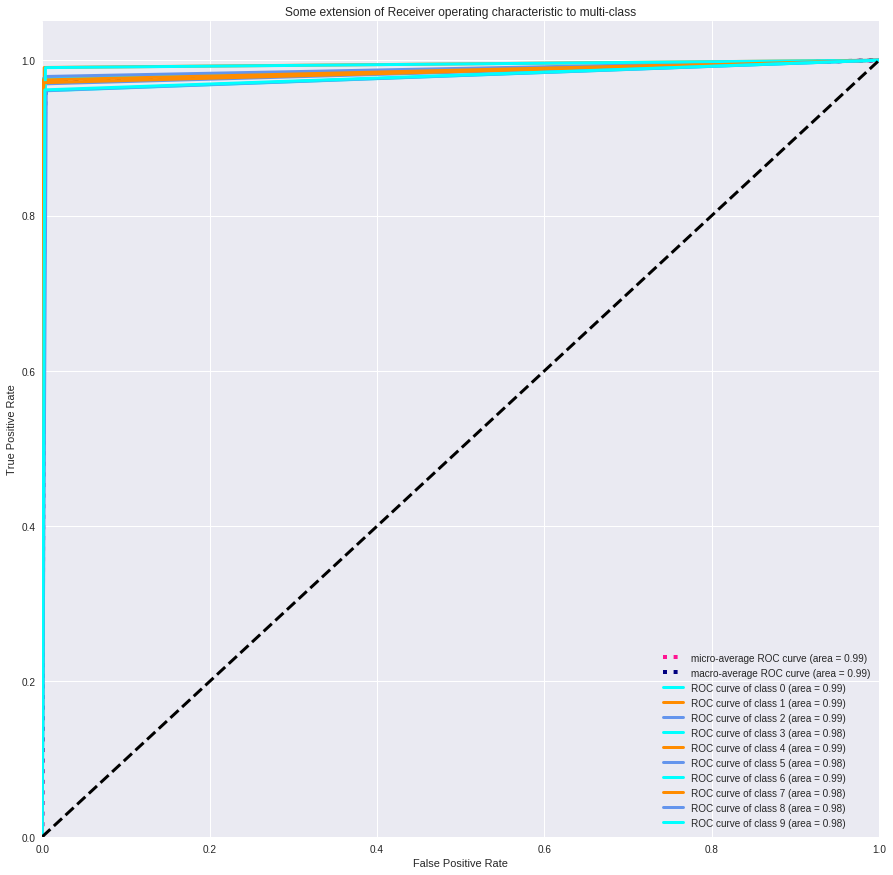

In [156]:
from itertools import cycle
lw=3
plt.figure(figsize=(15,15))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(class_size), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()